# Flatiron Modeling Pipeline — Data Exploration

Initial notebook to load the core dataset and perform a quick health check.

# MAJOR CAVEAT

While trying to fix a timestamp issue, I saw that the SCAM records *ALL* had timestamps in a different format.  This breaks everything and all my assumptions. And caused the model to "perform amazingly well"... but it was an illusion.

I need to rewrite this tonight. Please do not review yet, as it has major problems.

In [139]:
import io
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SECTION_DIVIDER = '=' * 40
SUB_SECTION_DIVIDER = '-' * 40

def print_heading(title: str):
    """Print a visually distinct major section header."""
    print(f"\n{SECTION_DIVIDER}\n{title}\n{SECTION_DIVIDER}\n")

def print_sub_heading(title: str):
    """Print a visually distinct sub-section header."""
    print(f"\n{SUB_SECTION_DIVIDER}\n{title}\n{SUB_SECTION_DIVIDER}\n")


In [140]:
DATA_PATH = 'data/Dataset.csv'

print_heading('Loading Raw Dataset')
print(f'Reading dataset from: {DATA_PATH}')
df = pd.read_csv(DATA_PATH)
print(f'Dataset loaded successfully with {len(df):,} rows and {len(df.columns)} columns.')

print_heading('Original Data Overview')

print_sub_heading('Data Head (First 5 Rows)')
pd.set_option('display.max_columns', None)
display(df.head())
pd.reset_option('display.max_columns')

print_sub_heading('Dataset Info (Schema & Non-Null Counts)')
buffer = io.StringIO()
df.info(buf=buffer)
print(buffer.getvalue())

print_sub_heading('Null Value Counts (Absolute)')
display(df.isnull().sum())

print_sub_heading('Descriptive Statistics (Numeric Columns)')
display(df.describe())

print_heading('Category Distribution Overview')
print_sub_heading('from_category Value Counts')
display(df['from_category'].value_counts(dropna=False))

print_sub_heading('to_category Value Counts')
display(df['to_category'].value_counts(dropna=False))



Loading Raw Dataset

Reading dataset from: data/Dataset.csv
Dataset loaded successfully with 71,250 rows and 18 columns.

Original Data Overview


----------------------------------------
Data Head (First 5 Rows)
----------------------------------------



,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,from_scam,to_scam,from_category,to_category
0,0x253ec84729f5c11437f5346830e6bdc9857171b16097...,370394,4,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xd707ac0098599006f0857e8da4c950795645ba01,1.800000e+18,30000,2.205000e+10,0x,129358,21000,2017-10-16 05:26:53 UTC,4370008,0x5e14d30d2155c0cdd65044d7e0f296373f3e92f65ebd...,0,0,NaN,NaN
1,0xfa5f1d7715562adb1e408fdbbbbfc033ae4fadca1e07...,229082,85,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xb8f6e76d34d4877732dfefa6b6a4e2a834a9092b,7.500000e+15,90000,2.060947e+10,0x,5415387,21000,2017-10-16 05:28:49 UTC,4370014,0x900efe010b41b8b6b135db041422fac80b69b96d93c2...,0,0,NaN,NaN
2,0x37928f1d12ee769d0876695aaa815c13d705f8b1e376...,229095,31,0x304cc179719bc5b05418d6f7f6783abe45d83090,0x5ec492652d7b92421680f21169ff6a8dbbc622ab,7.500000e+15,90000,2.060947e+10,0x,1369625,21000,2017-10-16 05:29:19 UTC,4370015,0xfe7d1bc1c6257f92bacb0f8b1266c9894dda99b42e78...,0,0,NaN,NaN
3,0xaad886f331a2fb40495cdf5faa10882852fcd324f064...,229126,78,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xdf01b231b53d8b4cbb1b092a8dc86730cebf4aa9,7.500000e+15,90000,2.060947e+10,0x,2464655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN
4,0x3dbe36fd1a1b01b5e1b343ff78ec1ec189feee5acf46...,229131,83,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xaa4b9693c54029d180134161cc99e98b76cea249,7.500000e+15,90000,2.060947e+10,0x,2569655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN



----------------------------------------
Dataset Info (Schema & Non-Null Counts)
----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71250 entries, 0 to 71249
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hash                         71250 non-null  object 
 1   nonce                        71250 non-null  int64  
 2   transaction_index            71250 non-null  int64  
 3   from_address                 71250 non-null  object 
 4   to_address                   71250 non-null  object 
 5   value                        71250 non-null  float64
 6   gas                          71250 non-null  int64  
 7   gas_price                    71250 non-null  float64
 8   input                        71250 non-null  object 
 9   receipt_cumulative_gas_used  71250 non-null  int64  
 10  receipt_gas_used             71250 non-null  int64  
 11  block_ti

hash                               0
nonce                              0
transaction_index                  0
from_address                       0
to_address                         0
value                              0
gas                                0
gas_price                          0
input                              0
receipt_cumulative_gas_used        0
receipt_gas_used                   0
block_timestamp                    0
block_number                       0
block_hash                         0
from_scam                          0
to_scam                            0
from_category                  68622
to_category                    59601
dtype: int64


----------------------------------------
Descriptive Statistics (Numeric Columns)
----------------------------------------



,nonce,transaction_index,value,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,block_number,from_scam,to_scam
count,7.125000e+04,71250.000000,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,71250.000000,71250.000000
mean,3.078713e+05,72.694035,1.002473e+19,6.834562e+04,3.449287e+10,2.946858e+06,2.627084e+04,5.209526e+06,0.036884,0.163495
std,9.978455e+05,64.650247,2.858156e+20,1.335602e+05,1.250177e+11,2.444175e+06,5.131794e+04,7.509279e+05,0.188479,0.369819
min,0.000000e+00,0.000000,0.000000e+00,2.100000e+04,1.000000e+00,2.100000e+04,2.100000e+04,4.370008e+06,0.000000,0.000000
25%,3.000000e+00,21.000000,2.490000e+16,2.100000e+04,8.000000e+09,7.744545e+05,2.100000e+04,4.900821e+06,0.000000,0.000000
50%,8.500000e+01,56.000000,2.480000e+17,3.500000e+04,2.000000e+10,2.338859e+06,2.100000e+04,5.067095e+06,0.000000,0.000000
75%,7.515425e+04,109.000000,1.500000e+18,9.000000e+04,5.060947e+10,4.820330e+06,2.100000e+04,5.285231e+06,0.000000,0.000000
max,1.372920e+07,379.000000,6.000000e+22,9.344755e+06,3.000000e+13,9.991824e+06,6.787079e+06,9.185954e+06,1.000000,1.000000



Category Distribution Overview


----------------------------------------
from_category Value Counts
----------------------------------------



from_category
NaN         68622
Scamming     1402
Phishing     1225
Fake ICO        1
Name: count, dtype: int64


----------------------------------------
to_category Value Counts
----------------------------------------



to_category
NaN         59601
Scamming     9758
Phishing     1891
Name: count, dtype: int64

### Original Ethereum Transaction Data — Feature Dictionary

| Field | Type | Meaning | Use | Notes |
|---|---|---|---|---|
| hash | string | Unique transaction hash | context | Not modeled directly; can be used as row ID |
| nonce | int | Per-sender transaction count at time of tx | dropped | Not used in current feature set |
| transaction_index | int | Position of tx within block | dropped | Block-local ordering only |
| from_address | string | Sender address | analysis | Used as key to build per-address features |
| to_address | string | Recipient address | analysis | Used as key to build per-address features |
| value | float | Transferred ETH amount in wei | analysis | Aggregated into incoming/outgoing amount features |
| gas | int | Gas limit specified for tx | analysis | Used for avg gas limit per address |
| gas_price | float | Gas price offered (wei per gas unit) | analysis | Used for avg gas price per address |
| input | string | Hex calldata / payload | dropped | Not parsed in this project |
| receipt_cumulative_gas_used | int | Total gas used in block up to this tx | dropped | Not used in current features |
| receipt_gas_used | int | Gas used by this tx alone | dropped | Redundant with other gas behavior for this analysis |
| block_timestamp | string → datetime | Block time for tx | analysis | Parsed to UTC; basis for all time/sequence features |
| block_number | int | Block height containing tx | dropped | Highly collinear with timestamp; not modeled directly |
| block_hash | string | Hash of containing block | dropped | Not used in current features |
| from_scam | int (0/1) | Source is labeled scam address | analysis | Used to construct per-address Scam label |
| to_scam | int (0/1) | Destination is labeled scam address | analysis | Used to construct per-address Scam label |
| from_category | string | Labeled category for sender | analysis | Used to flag scam/fraud/phish categories |
| to_category | string | Labeled category for recipient | analysis | Used to flag scam/fraud/phish categories |


----------------------------------------
Correlation Heatmap (Numeric Columns)
----------------------------------------

This heatmap shows correlations between numerical fields. This helps identify redundant columns, groups of related economic signals, and whether any raw variables are providing overlapping information.


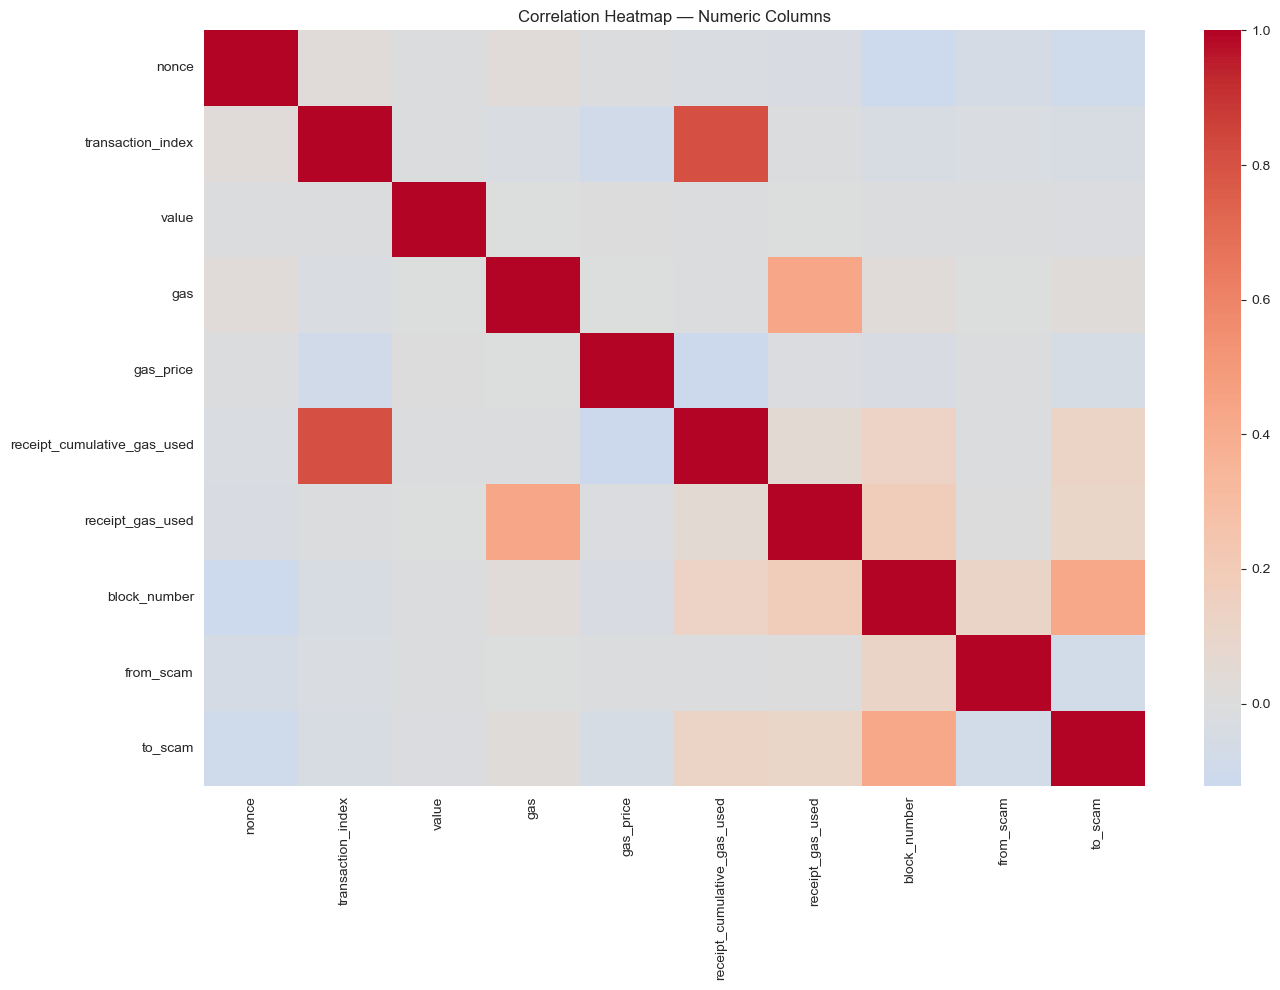

In [141]:
# -----------------------------------------------------
# Correlation Heatmap (Numeric Columns)
# -----------------------------------------------------

print_sub_heading("Correlation Heatmap (Numeric Columns)")

print(
    "This heatmap shows correlations between numerical fields. "
    "This helps identify redundant columns, groups of related economic signals, "
    "and whether any raw variables are providing overlapping information."
)

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(14,10))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap — Numeric Columns")
plt.tight_layout()
plt.show()


Section 2 — Timestamp & Temporal Sanity Checks


Preprocessing — Timestamp Normalization


----------------------------------------
Purpose
----------------------------------------

Before running the EDA, we must convert the raw string timestamps into a consistent datetime format. This creates `block_timestamp_dt`, `hour`, and `weekday`, which several EDA charts rely on.
types: 
 block_timestamp
<class 'str'>    71250
Name: count, dtype: int64
isna:
 0
types: 
 block_timestamp_dt
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    71250
Name: count, dtype: int64
isna:
 0
did not convert:
 Series([], Name: block_timestamp, dtype: object)
Parsed timestamps: 71250
Unparseable timestamps: 0

----------------------------------------
Purpose
----------------------------------------

Ethereum block timestamps follow a stable rhythm. These charts confirm dataset coverage, identify gaps, and detect non-realistic sampling patterns.

----------------------------------------
Transaction Timest

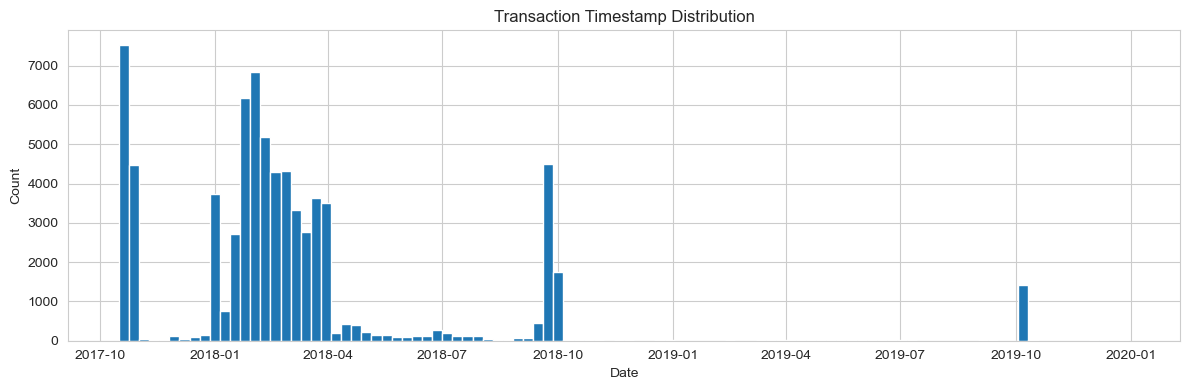


----------------------------------------
Daily Transaction Volume Curve
----------------------------------------



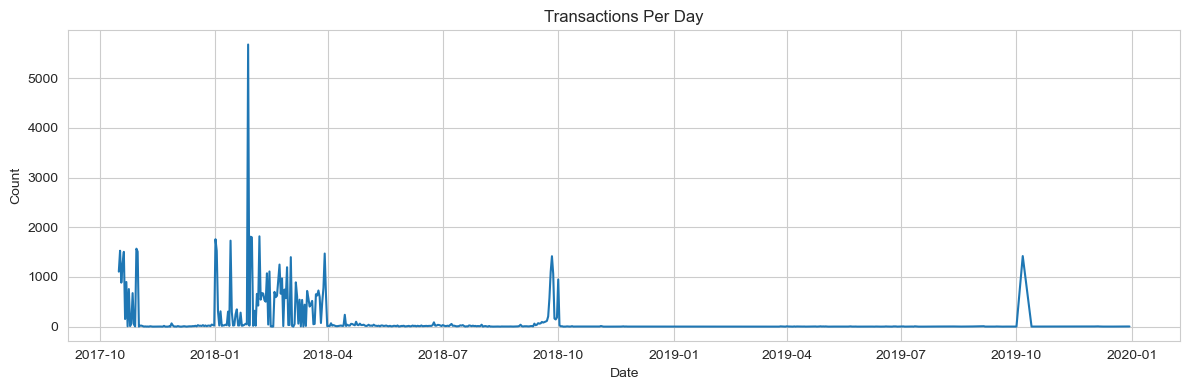


----------------------------------------
Transactions by Hour of Day
----------------------------------------

This chart shows how transaction activity is distributed across hours of the day. Human activity produces peaks; bots produce flat or highly irregular profiles.


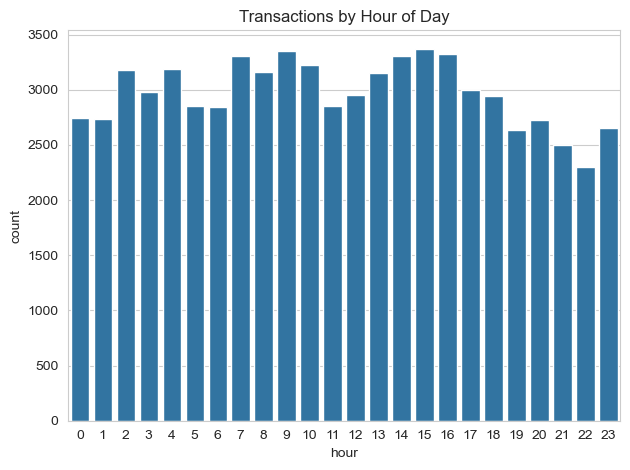


----------------------------------------
Transactions by Day of Week
----------------------------------------

This chart shows weekly activity rhythms. Human activity is cyclical (weekdays vs weekends). Bots and programmatic systems often show no weekly rhythm.


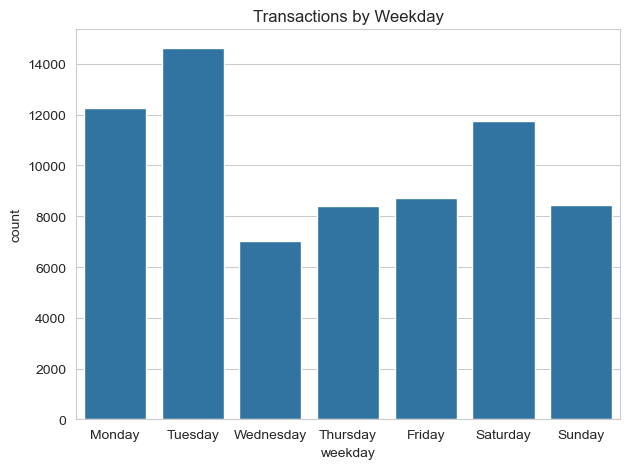

In [142]:
# %%
print_heading("Section 2 — Timestamp & Temporal Sanity Checks")


# %%
print_heading("Preprocessing — Timestamp Normalization")

print_sub_heading("Purpose")
print(
    "Before running the EDA, we must convert the raw string timestamps into "
    "a consistent datetime format. This creates `block_timestamp_dt`, `hour`, "
    "and `weekday`, which several EDA charts rely on."
)

print("types: \n",df['block_timestamp'].apply(type).value_counts())
print("isna:\n",df['block_timestamp'].isna().sum())


raw_ts = df['block_timestamp'].astype(str)

clean_ts = (
    raw_ts.str.replace(" UTC", "", regex=False)
          .str.replace(" UTC+0000", "", regex=False)
          .str.replace("+0000 UTC", "", regex=False)
          .str.replace(" Z", "", regex=False)
          .str.replace("+00:00", "", regex=False)  # <-- handle your examples
          .str.strip()
)

df['block_timestamp_dt'] = pd.to_datetime(
    clean_ts,
    utc=True,
    errors='coerce'
)




print("types: \n",df['block_timestamp_dt'].apply(type).value_counts())
print("isna:\n",df['block_timestamp_dt'].isna().sum())

bad = df.loc[df['block_timestamp_dt'].isna(), 'block_timestamp']
print("did not convert:\n", bad.head())


df['hour'] = df['block_timestamp_dt'].dt.hour
df['weekday'] = df['block_timestamp_dt'].dt.day_name()

print("Parsed timestamps:", df['block_timestamp_dt'].notna().sum())
print("Unparseable timestamps:", df['block_timestamp_dt'].isna().sum())


print_sub_heading("Purpose")
print(
    "Ethereum block timestamps follow a stable rhythm. "
    "These charts confirm dataset coverage, identify gaps, and detect non-realistic sampling patterns."
)

# Timestamp distribution
print_sub_heading("Transaction Timestamp Distribution")
df['block_timestamp_dt'].hist(bins=100, figsize=(12,4))
plt.title("Transaction Timestamp Distribution")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Daily volume
print_sub_heading("Daily Transaction Volume Curve")
daily = df.groupby(df['block_timestamp_dt'].dt.date).size()
plt.figure(figsize=(12,4))
plt.plot(daily.index, daily.values)
plt.title("Transactions Per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Hour-of-Day Activity Pattern
# -----------------------------------------------------

print_sub_heading("Transactions by Hour of Day")

print(
    "This chart shows how transaction activity is distributed across hours of the day. "
    "Human activity produces peaks; bots produce flat or highly irregular profiles."
)

sns.countplot(x='hour', data=df)
plt.title("Transactions by Hour of Day")
plt.tight_layout()
plt.show()


# -----------------------------------------------------
# Day-of-Week Activity Pattern
# -----------------------------------------------------

print_sub_heading("Transactions by Day of Week")

print(
    "This chart shows weekly activity rhythms. "
    "Human activity is cyclical (weekdays vs weekends). "
    "Bots and programmatic systems often show no weekly rhythm."
)

sns.countplot(
    x='weekday',
    data=df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.title("Transactions by Weekday")
plt.tight_layout()
plt.show()




Section 3 — Intertransaction Gaps


----------------------------------------
Purpose
----------------------------------------

Time gaps between transactions reveal whether activity is human-paced or bot-like. Fraudulent wallets often show bursty patterns with very short or very uniform gaps.

----------------------------------------
Intertransaction Gap Distribution (log histogram)
----------------------------------------



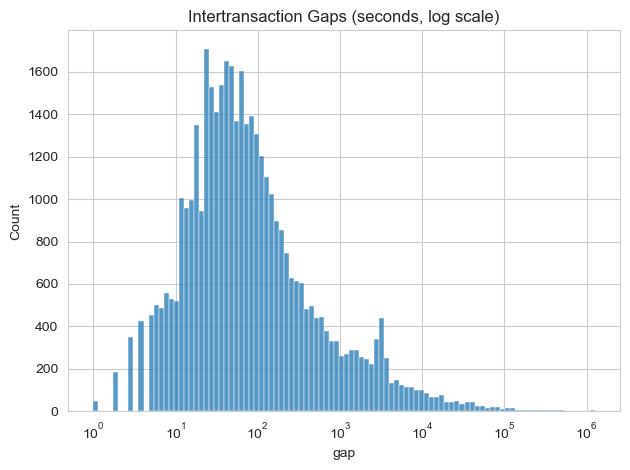


----------------------------------------
Intertransaction Gap CDF
----------------------------------------



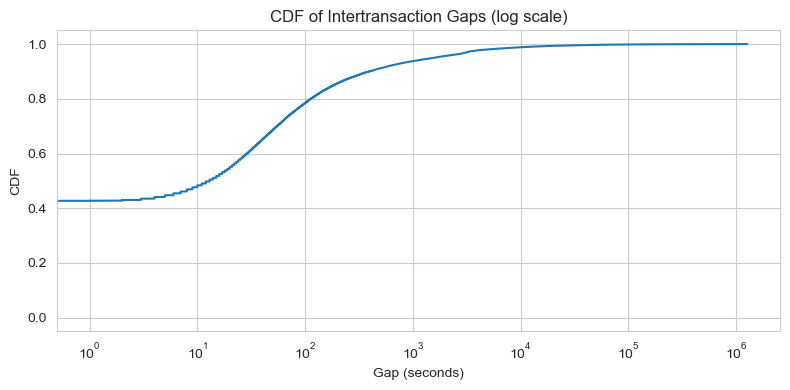

In [143]:
# %%
print_heading("Section 3 — Intertransaction Gaps")

print_sub_heading("Purpose")
print(
    "Time gaps between transactions reveal whether activity is human-paced or bot-like. "
    "Fraudulent wallets often show bursty patterns with very short or very uniform gaps."
)

# Compute differences
df_sorted = df.sort_values("block_timestamp_dt")
df_sorted["gap"] = df_sorted["block_timestamp_dt"].diff().dt.total_seconds()

# Gap histogram (log)
print_sub_heading("Intertransaction Gap Distribution (log histogram)")
sns.histplot(df_sorted['gap'].dropna(), bins=100, log_scale=True)
plt.title("Intertransaction Gaps (seconds, log scale)")
plt.tight_layout()
plt.show()

# Gap CDF
print_sub_heading("Intertransaction Gap CDF")
gaps = df_sorted['gap'].dropna().sort_values()
yvals = np.arange(len(gaps)) / float(len(gaps))
plt.figure(figsize=(8,4))
plt.plot(gaps, yvals)
plt.xscale("log")
plt.title("CDF of Intertransaction Gaps (log scale)")
plt.xlabel("Gap (seconds)")
plt.ylabel("CDF")
plt.tight_layout()
plt.show()


Section 4 — Gas & Value Behavior (Cleaned + Joint)


----------------------------------------
Purpose
----------------------------------------

Ethereum economic behavior (gas usage, gas price, and value transferred) reveals wallet intent. Fraudulent wallets often show atypical gas pricing or transaction values. Log histograms and joint density plots help expose that.

----------------------------------------
Gas Distribution (log histogram)
----------------------------------------



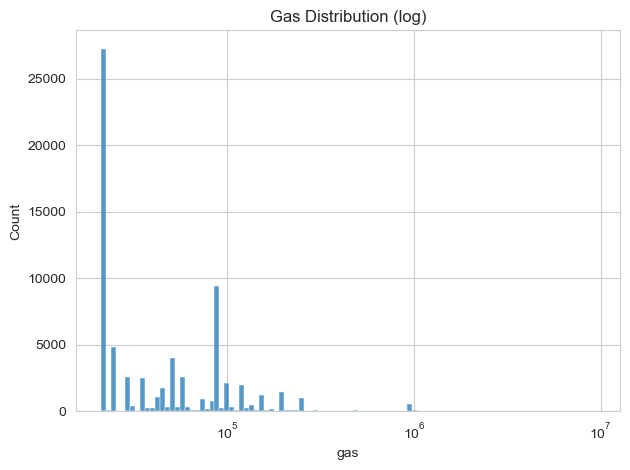


----------------------------------------
Gas Price Distribution (log histogram)
----------------------------------------



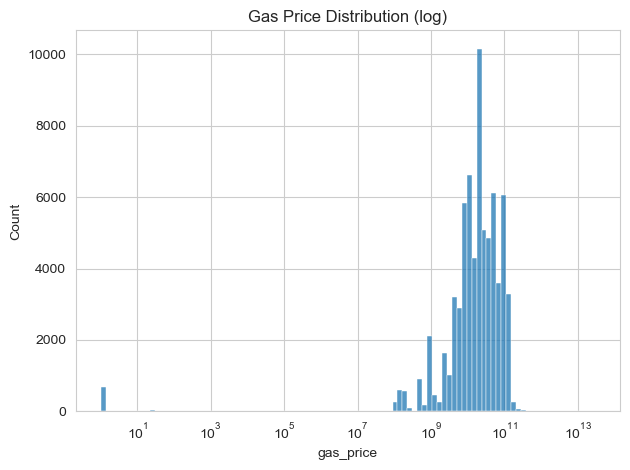


----------------------------------------
Joint Value vs Gas Price (Hexbin, log-log)
----------------------------------------



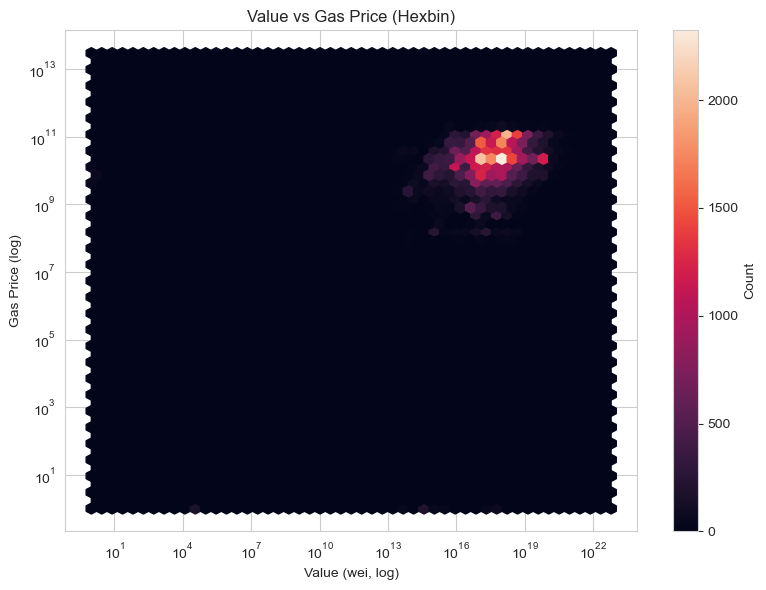

In [144]:
# %%
print_heading("Section 4 — Gas & Value Behavior (Cleaned + Joint)")

print_sub_heading("Purpose")
print(
    "Ethereum economic behavior (gas usage, gas price, and value transferred) "
    "reveals wallet intent. Fraudulent wallets often show atypical gas pricing "
    "or transaction values. Log histograms and joint density plots help expose that."
)

# Gas histogram (log)
print_sub_heading("Gas Distribution (log histogram)")
sns.histplot(df['gas'], bins=100, log_scale=True)
plt.title("Gas Distribution (log)")
plt.tight_layout()
plt.show()

# Gas price histogram (log)
print_sub_heading("Gas Price Distribution (log histogram)")
sns.histplot(df['gas_price'], bins=100, log_scale=True)
plt.title("Gas Price Distribution (log)")
plt.tight_layout()
plt.show()

# Cleaned hexbin
print_sub_heading("Joint Value vs Gas Price (Hexbin, log-log)")

tmp = df[(df['value'] > 0) & (df['gas_price'] > 0)]

plt.figure(figsize=(8,6))
plt.hexbin(tmp['value'], tmp['gas_price'], gridsize=50, xscale='log', yscale='log')
plt.colorbar(label="Count")
plt.xlabel("Value (wei, log)")
plt.ylabel("Gas Price (log)")
plt.title("Value vs Gas Price (Hexbin)")
plt.tight_layout()
plt.show()


Section 5 — Input Length / Transaction Type


----------------------------------------
Purpose
----------------------------------------

The hex-encoded input field reveals whether a transaction is a plain ETH transfer, a contract interaction, or an ERC20 transfer. The length of the input string is a strong proxy.

----------------------------------------
Distribution of Input Length
----------------------------------------



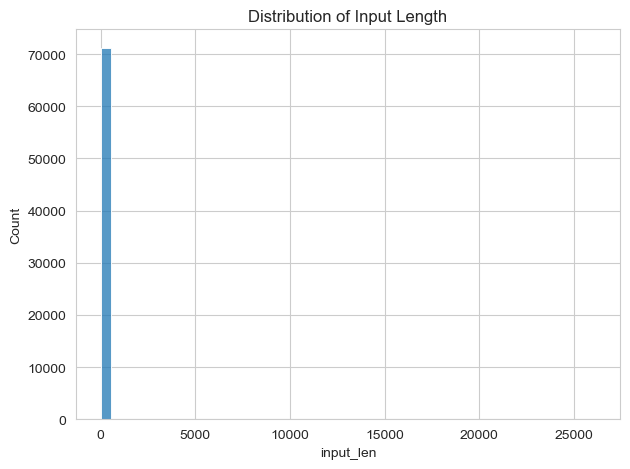


----------------------------------------
Top Input Length Buckets
----------------------------------------



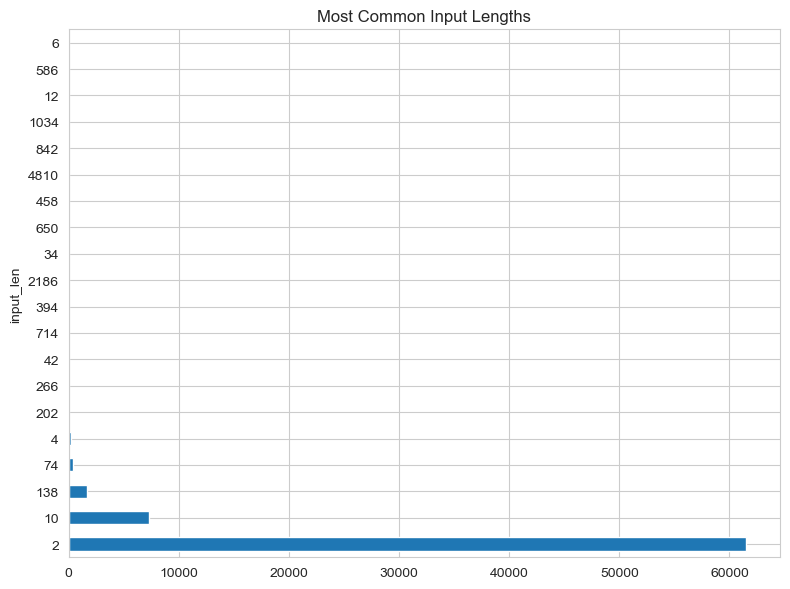

In [145]:
# %%
print_heading("Section 5 — Input Length / Transaction Type")

print_sub_heading("Purpose")
print(
    "The hex-encoded input field reveals whether a transaction is a plain ETH transfer, "
    "a contract interaction, or an ERC20 transfer. The length of the input string is a strong proxy."
)

# Compute lengths
df['input_len'] = df['input'].astype(str).apply(len)

# Histogram
print_sub_heading("Distribution of Input Length")
sns.histplot(df['input_len'], bins=50, log_scale=False)
plt.title("Distribution of Input Length")
plt.tight_layout()
plt.show()

# Top buckets
print_sub_heading("Top Input Length Buckets")
df['input_len'].value_counts().head(20).plot(kind='barh', figsize=(8,6))
plt.title("Most Common Input Lengths")
plt.tight_layout()
plt.show()


Section 6 — Address Activity Patterns


----------------------------------------
Purpose
----------------------------------------

Ethereum address activity follows a power-law distribution: a few addresses dominate, while most make only a handful of transactions. Fraud clusters often appear in the tails.

----------------------------------------
Address Rank-Frequency (Zipf Plot)
----------------------------------------



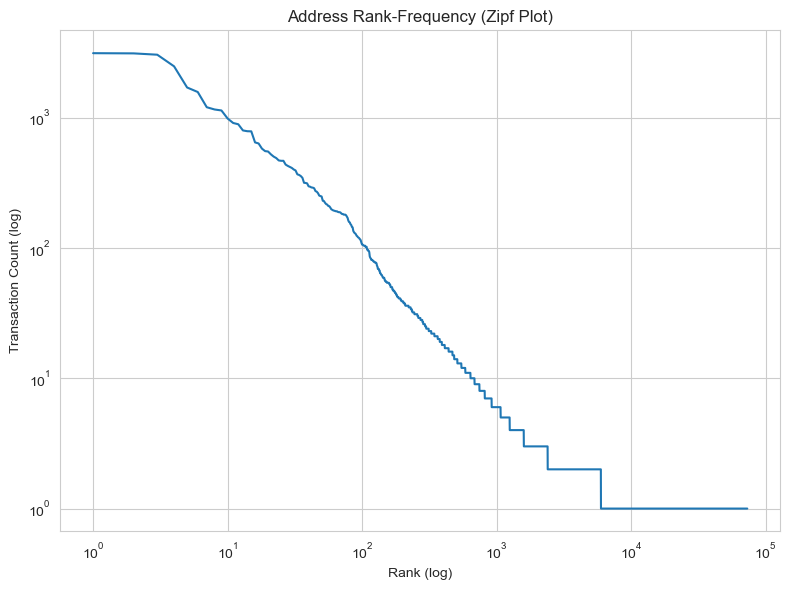


----------------------------------------
In-Degree CDF
----------------------------------------



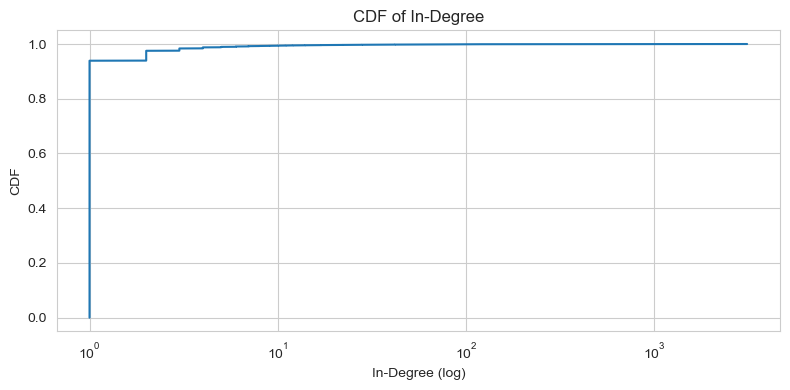


----------------------------------------
Out-Degree CDF
----------------------------------------



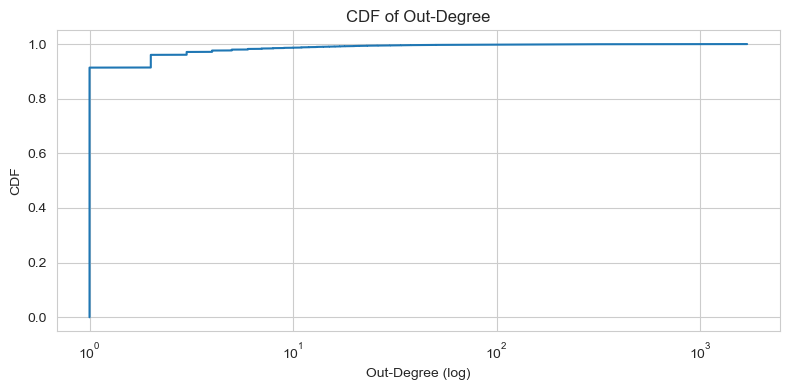

In [146]:
# %%
print_heading("Section 6 — Address Activity Patterns")

print_sub_heading("Purpose")
print(
    "Ethereum address activity follows a power-law distribution: a few addresses dominate, "
    "while most make only a handful of transactions. Fraud clusters often appear in the tails."
)

# Compute counts
from_counts = df['from_address'].value_counts()
to_counts   = df['to_address'].value_counts()
address_counts = from_counts.add(to_counts, fill_value=0)

# Zipf plot
print_sub_heading("Address Rank-Frequency (Zipf Plot)")
rank = np.arange(1, len(address_counts)+1)
freq = np.sort(address_counts.values)[::-1]
plt.figure(figsize=(8,6))
plt.loglog(rank, freq)
plt.xlabel("Rank (log)")
plt.ylabel("Transaction Count (log)")
plt.title("Address Rank-Frequency (Zipf Plot)")
plt.tight_layout()
plt.show()

# In-degree CDF
print_sub_heading("In-Degree CDF")
in_deg = to_counts.sort_values()
cdf = np.arange(len(in_deg)) / len(in_deg)
plt.figure(figsize=(8,4))
plt.plot(in_deg.values, cdf)
plt.xscale("log")
plt.xlabel("In-Degree (log)")
plt.ylabel("CDF")
plt.title("CDF of In-Degree")
plt.tight_layout()
plt.show()

# Out-degree CDF
print_sub_heading("Out-Degree CDF")
out_deg = from_counts.sort_values()
cdf = np.arange(len(out_deg)) / len(out_deg)
plt.figure(figsize=(8,4))
plt.plot(out_deg.values, cdf)
plt.xscale("log")
plt.xlabel("Out-Degree (log)")
plt.ylabel("CDF")
plt.title("CDF of Out-Degree")
plt.tight_layout()
plt.show()


Section 7 — Scam vs Non-Scam Behavior


----------------------------------------
Purpose
----------------------------------------

Side-by-side distributions expose whether scam-labeled wallets behave differently in value transferred, gas price used, or transaction intent.

----------------------------------------
Value Distribution: Scam vs Non-Scam
----------------------------------------



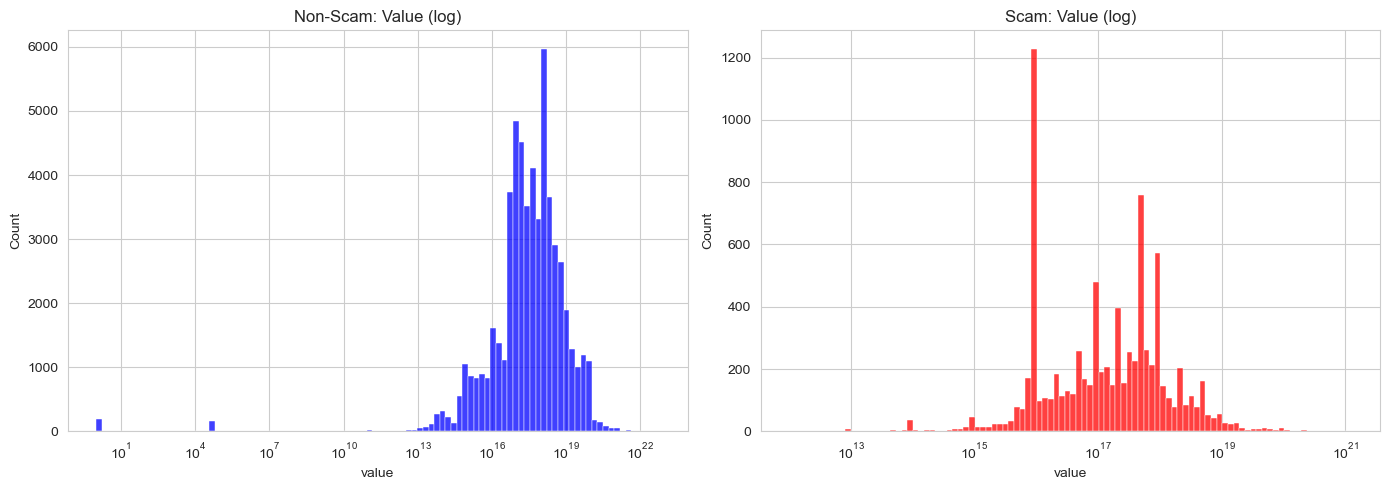


----------------------------------------
Gas Price Distribution: Scam vs Non-Scam
----------------------------------------



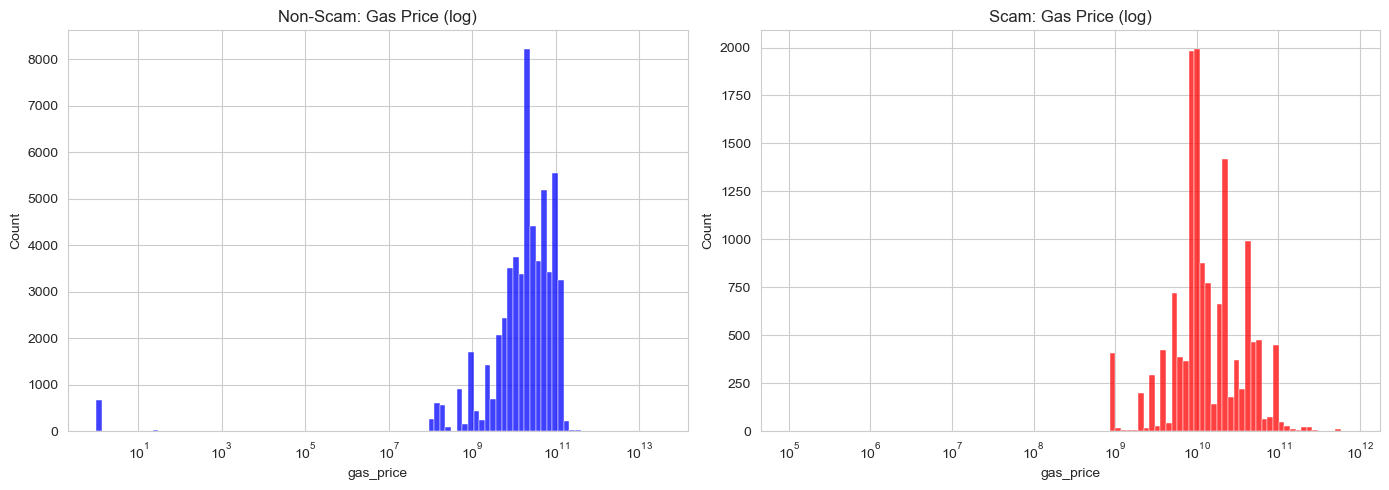


----------------------------------------
Top Non-Missing Categories
----------------------------------------



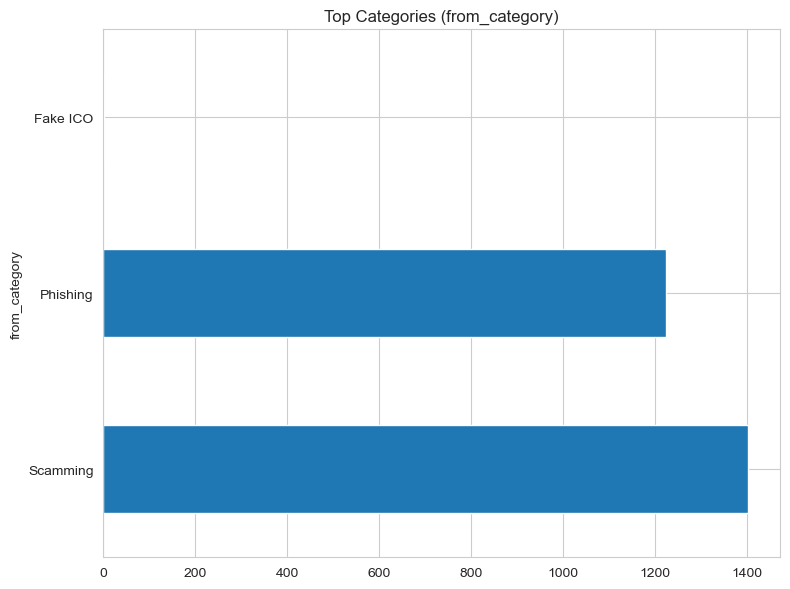

In [147]:
# %%
print_heading("Section 7 — Scam vs Non-Scam Behavior")

print_sub_heading("Purpose")
print(
    "Side-by-side distributions expose whether scam-labeled wallets behave differently "
    "in value transferred, gas price used, or transaction intent."
)

scam_mask = (df['from_scam']==1) | (df['to_scam']==1)

# Side-by-side layout
fig, axes = plt.subplots(1,2, figsize=(14,5))

print_sub_heading("Value Distribution: Scam vs Non-Scam")
sns.histplot(df.loc[~scam_mask, 'value'], bins=100, log_scale=True, ax=axes[0], color='blue')
axes[0].set_title("Non-Scam: Value (log)")
sns.histplot(df.loc[ scam_mask, 'value'], bins=100, log_scale=True, ax=axes[1], color='red')
axes[1].set_title("Scam: Value (log)")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2, figsize=(14,5))
print_sub_heading("Gas Price Distribution: Scam vs Non-Scam")
sns.histplot(df.loc[~scam_mask, 'gas_price'], bins=100, log_scale=True, ax=axes[0], color='blue')
axes[0].set_title("Non-Scam: Gas Price (log)")
sns.histplot(df.loc[ scam_mask, 'gas_price'], bins=100, log_scale=True, ax=axes[1], color='red')
axes[1].set_title("Scam: Gas Price (log)")
plt.tight_layout()
plt.show()

# Top categories
print_sub_heading("Top Non-Missing Categories")
(df['from_category'].dropna().value_counts().head(10)).plot(kind='barh', figsize=(8,6))
plt.title("Top Categories (from_category)")
plt.tight_layout()
plt.show()

In [148]:
# %%
print_heading("EDA Complete — Dataset Ready for Feature Engineering")


EDA Complete — Dataset Ready for Feature Engineering




## **Key Takeaways from the EDA**

The EDA reveals several important structural patterns in the transaction data. These patterns shape both our feature engineering strategy and our expectations for what a predictive model can realistically learn.

---

#### **1. The Dataset Is Not a Continuous Scrape of Ethereum**

The daily transaction volume curve and timestamp normalization step reveal enormous gaps, irregular bursts, and non-uniform coverage. This means we are not looking at a natural stream of blockchain activity—this dataset is a stitched subset.

**Implication for modeling:** 

→ Temporal features should be interpreted as describing *wallet behavior* rather than *global Ethereum trends*.

→ Features like burstiness, intertransaction gaps, and recency are still meaningful because they’re relative within each address’s activity history.

→ But we should not expect weekly/hourly human-rhythm patterns to help; they simply aren’t present.

---

#### **2. Time Gaps Reveal Behavioral Signatures (Bursty vs Human-paced)**

The intertransaction gap histogram (log scale) and CDF show a heavy-tailed distribution with many extremely short gaps. Scam-linked wallets often transact in quick bursts (e.g., draining funds, forwarding ETH, or interacting with phishing contracts).

**Implication for modeling:** 

→ Intertransaction gap statistics (mean, median, max gap, burstiness ratio) are potentially strong differentiators.

→ Time-based irregularity is a behavior worth encoding in the engineered feature set.

---

#### **3. Gas Usage and Gas Price Distributions Are Skewed and Multi-modal**

Both gas and gas-price histograms—on a log scale—show long tails, spikes, and behavior that clusters at specific operational regimes. The joint hexbin plot (value vs gas price) highlights dense “normal” regions versus scattered outliers.

**Implication for modeling:** 

→ Raw values are too skewed for simple thresholds; log transformations or robust scaling help.

→ Address-level aggregates (avg gas price, gas limit, max value sent, etc.) are more stable and meaningful than raw per-transaction fields.

→ Scam addresses may occupy different zones in these joint distributions.

---

#### **4. Input Length Distribution Confirms Transaction Type Variety**

Most transactions have input_len = 2 (“0x”—plain ETH transfers), but a long tail exists for contract interactions and ERC-20 operations.

**Implication for modeling:** 

→ Input complexity is a proxy for interaction type.

→ Aggregating input-length statistics per address may help differentiate “simple transfer wallets” from “smart-contract-heavy wallets.”

---

#### **5. Address Activity Follows a Heavy-Tail Distribution**

The Zipf plot and the in-degree/out-degree CDFs show a classic power-law structure:

* A tiny number of addresses transact heavily,

* while the vast majority interact only once or twice.

**Implication for modeling:** 

→ Transaction count, unique counterparties, and degree-based features are key signals.

→ Scam behavior often shows unusual degrees: either very low diversity (funnels) or very high diversity (spray attacks).

→ Models need normalization or scaling to handle the extreme range in counts.

---

#### **6. Scam vs Non-Scam Comparisons Suggest Real Behavioral Separation**

The side-by-side scam vs non-scam histograms (value, gas price) show visible distribution differences. Scams tend to cluster around particular ranges and show more outliers.

**Implication for modeling:** 

→ There is real signal in the engineered address-level features.

→ The model will likely rely on:

* burstiness,

* value/gas aggregates,

* degree metrics,

* recency and lifespan,

* diversity of counterparties.

---

### **Overall Modeling Expectations**

Taken together, the EDA supports a behavior-driven fraud model:

* Predictive power will come from **address-level behavioral patterns**, not raw transaction-level values.

* Time features matter only in relative terms (per wallet), not globally.

* Degree features, burstiness, activity density, gas/value aggregates, and address lifespan are likely the strongest predictors.

* The model should not expect a clean or balanced dataset; scam behavior is rare and varied.

* Interpretability will come from understanding wallet behavior clusters rather than relying on explicit labels.

This EDA validates the feature engineering direction you’ve taken and gives a realistic picture of what the downstream model can—and cannot—learn from this dataset.


In [149]:
print(tx['block_timestamp'].apply(type).value_counts())

block_timestamp
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    71250
Name: count, dtype: int64


In [150]:
print(tx['block_timestamp'].isna().sum())
results = pd.to_datetime(tx['block_timestamp'], utc=True, errors='coerce')
bad = tx.loc[results.isna(), 'block_timestamp']

for s in bad.head(20):
    print("RAW:", repr(s))
    print("ORDS:", [ord(c) for c in s])
    print()

0


In [151]:

# Feature Engineering (Bulletproof + Row-Safe)

import pandas as pd
import numpy as np
import networkx as nx

SECTION_DIVIDER = '=' * 40
SUB_SECTION_DIVIDER = '-' * 40

def print_heading(title: str):
    print(f"\n{SECTION_DIVIDER}\n{title}\n{SECTION_DIVIDER}\n")

def print_sub_heading(title: str):
    print(f"\n{SUB_SECTION_DIVIDER}\n{title}\n{SUB_SECTION_DIVIDER}\n")


# ============================================================
# 0. WORK FROM A COPY
# ============================================================

print_heading("Preparing Transaction Data for Feature Engineering")

tx = df.copy()
print("Initial row count:", len(tx))


# # ============================================================
# # 1. BULLETPROOF TIMESTAMP PARSING
# # ============================================================

raw_ts = tx['block_timestamp'].astype(str)

clean_ts = (
    raw_ts.str.replace(" UTC", "", regex=False)
          .str.replace(" UTC+0000", "", regex=False)
          .str.replace("+0000 UTC", "", regex=False)
          .str.replace(" Z", "", regex=False)
          .str.replace("+00:00", "", regex=False)  # <-- handle your examples
          .str.strip()
)

tx['block_timestamp'] = pd.to_datetime(
    clean_ts,
    utc=True,
    errors='coerce'
)

bad = df.loc[df['block_timestamp'].isna(), 'block_timestamp']

print("did not convert:\n", bad.head())
# print the cont of bad
print("Number of unparseable timestamps:", bad.shape[0])

# Seconds since dataset start
global_start = tx['block_timestamp'].min()
tx['ts_seconds'] = (tx['block_timestamp'] - global_start).dt.total_seconds()


# ============================================================
# 2. NUMERIC CLEANING — ZERO LOSS
# ============================================================

numeric_cols = [
    'value', 'gas', 'gas_price',
    'receipt_cumulative_gas_used', 'receipt_gas_used'
]

print_heading("Numeric Column Diagnostics")

for col in numeric_cols:
    # Check invalid values BEFORE converting
    raw = tx[col].astype(str)
    bad_mask = pd.to_numeric(raw, errors='coerce').isna()
    bad_count = bad_mask.sum()

    print(f"{col}: invalid={bad_count}")

    # Convert → fill NaN with 0 → no rows dropped
    tx[col] = pd.to_numeric(raw, errors='coerce').fillna(0)

print("Numeric cleaning complete. Rows retained:", len(tx))


# ============================================================
# 3. DEGREE & AMOUNT FEATURES
# ============================================================

print_heading("Degree & Amount Features")

# Degrees
in_degree = tx.groupby('to_address').size().rename('in_degree')
out_degree = tx.groupby('from_address').size().rename('out_degree')
all_degree = in_degree.add(out_degree, fill_value=0).rename('all_degree')

unique_in_degree = (
    tx.groupby('to_address')['from_address']
      .nunique()
      .rename('unique in_degree')
)

unique_out_degree = (
    tx.groupby('from_address')['to_address']
      .nunique()
      .rename('unique out_degree')
)

# Amount stats
incoming_amounts = (
    tx.groupby('to_address')['value']
      .agg(['mean', 'sum', 'max', 'min'])
      .rename(columns={
          'mean': 'Avg amount incoming',
          'sum':  'Total amount incoming',
          'max':  'Max amount incoming',
          'min':  'Min amount incoming',
      })
)

outgoing_amounts = (
    tx.groupby('from_address')['value']
      .agg(['mean', 'sum', 'max', 'min'])
      .rename(columns={
          'mean': 'Avg amount outgoing',
          'sum':  'Total amount outgoing',
          'max':  'Max amount outgoing',
          'min':  'Min amount outgoing',
      })
)


# ============================================================
# 4. BUILD FEATURE TABLE
# ============================================================

all_addresses = (
    pd.concat([tx['from_address'], tx['to_address']])
      .dropna()
      .unique()
)

features = pd.DataFrame(index=all_addresses)
features.index.name = 'Address'

# Join degree features
features = (
    features.join(all_degree, how='left')
            .join(in_degree, how='left')
            .join(out_degree, how='left')
            .join(unique_in_degree, how='left')
            .join(unique_out_degree, how='left')
)

# Join amount features
features = (
    features.join(incoming_amounts, how='left')
            .join(outgoing_amounts, how='left')
)

# Fill 0 for missing numeric combos
features[['all_degree', 'in_degree', 'out_degree',
          'unique in_degree', 'unique out_degree']] = (
    features[['all_degree', 'in_degree', 'out_degree',
              'unique in_degree', 'unique out_degree']]
    .fillna(0)
    .astype(int)
)

amount_cols = [
    'Avg amount incoming', 'Total amount incoming',
    'Max amount incoming', 'Min amount incoming',
    'Avg amount outgoing', 'Total amount outgoing',
    'Max amount outgoing', 'Min amount outgoing',
]

features[amount_cols] = features[amount_cols].fillna(0)



# ============================================================
# 5. TIME-BASED FEATURES
# ============================================================

print_heading("Time-Based Features")

# Long-form table for time + gas stats
incoming_long = tx[['to_address', 'ts_seconds', 'gas', 'gas_price']].rename(
    columns={'to_address': 'Address'}
)
incoming_long['direction'] = 'in'

outgoing_long = tx[['from_address', 'ts_seconds', 'gas', 'gas_price']].rename(
    columns={'from_address': 'Address'}
)
outgoing_long['direction'] = 'out'

long_df = pd.concat([incoming_long, outgoing_long], ignore_index=True)
long_df = long_df.dropna(subset=['Address'])


# ---------- Avg time incoming/outgoing ----------
avg_time_in = (
    long_df[long_df['direction'] == 'in']
    .groupby('Address')['ts_seconds']
    .mean()
    .rename('Avg time incoming')
)

avg_time_out = (
    long_df[long_df['direction'] == 'out']
    .groupby('Address')['ts_seconds']
    .mean()
    .rename('Avg time outgoing')
)

features = features.join(avg_time_in, how='left')
features = features.join(avg_time_out, how='left')

features[['Avg time incoming', 'Avg time outgoing']] = (
    features[['Avg time incoming', 'Avg time outgoing']].fillna(0.0)
)


# ---------- Total transaction time, Active Duration, Intervals ----------
def compute_time_stats(group):
    """Compute lifespan + time interval stats for a single address."""
    times = np.sort(group['ts_seconds'].values)
    if len(times) == 0:
        return pd.Series({
            'Total transaction time': 0.0,
            'Active Duration': 0.0,
            'Mean time interval': 0.0,
            'Max time interval': 0.0,
            'Min time interval': 0.0,
        })

    first = times[0]
    last = times[-1]
    active = last - first

    if len(times) > 1:
        gaps = np.diff(times)
        mean_gap = float(gaps.mean())
        max_gap = float(gaps.max())
        min_gap = float(gaps.min())
        total_tx_time = float(gaps.sum())  # equals last - first
    else:
        mean_gap = max_gap = min_gap = 0.0
        total_tx_time = 0.0

    return pd.Series({
        'Total transaction time': total_tx_time,
        'Active Duration': active,
        'Mean time interval': mean_gap,
        'Max time interval': max_gap,
        'Min time interval': min_gap,
    })

time_stats = long_df.groupby('Address').apply(compute_time_stats)
features = features.join(time_stats, how='left')

for col in [
    'Total transaction time', 'Active Duration',
    'Mean time interval', 'Max time interval', 'Min time interval'
]:
    features[col] = features[col].fillna(0.0)


# ============================================================
# 5B. ADVANCED TEMPORAL BEHAVIOR FEATURES
# ============================================================

print_heading("Advanced Temporal Behavior Features")

# Pre-extract times and hours
long_df['hour'] = (global_start + pd.to_timedelta(long_df['ts_seconds'], unit='s')).dt.hour

# ---- Burstiness (max_gap / median_gap) ----
def compute_burstiness(group):
    times = np.sort(group['ts_seconds'].values)
    if len(times) <= 2:
        return pd.Series({'Burstiness': 0.0})
    gaps = np.diff(times)
    med = np.median(gaps)
    if med == 0:
        return pd.Series({'Burstiness': float(gaps.max())})
    return pd.Series({'Burstiness': float(gaps.max() / med)})

burst = long_df.groupby('Address').apply(compute_burstiness)
features = features.join(burst, how='left')
features['Burstiness'] = features['Burstiness'].fillna(0.0)


# ---- Activity density (#tx / active_duration) ----
density = (
    long_df.groupby('Address')
           .size()
           .rename('Tx count')
)

features = features.join(density, how='left')
features['Tx count'] = features['Tx count'].fillna(0)

features['Activity Density'] = (
    features['Tx count'] / (features['Active Duration'] + 1)
).astype(float)


# ---- Incoming/outgoing ratio ----
incoming_ct = long_df[long_df['direction']=='in'].groupby('Address').size().rename('Incoming count')
outgoing_ct = long_df[long_df['direction']=='out'].groupby('Address').size().rename('Outgoing count')

features = features.join(incoming_ct, how='left')
features = features.join(outgoing_ct, how='left')

features[['Incoming count', 'Outgoing count']] = (
    features[['Incoming count', 'Outgoing count']].fillna(0)
)

features['In/Out Ratio'] = (
    features['Incoming count'] / (features['Outgoing count'] + 1)
).astype(float)


# ---- Hour-of-day entropy + mean hour (SAFE VERSION) ----

records = []

for address, group in long_df.groupby('Address'):
    hours = group['hour'].values
    if len(hours) == 0:
        hour_mean = 0.0
        hour_entropy = 0.0
    else:
        counts = np.bincount(hours, minlength=24)
        total = counts.sum()
        if total == 0:
            hour_mean = 0.0
            hour_entropy = 0.0
        else:
            probs = counts / total
            probs = probs[probs > 0]
            hour_entropy = float(-(probs * np.log2(probs)).sum())
            hour_mean = float(hours.mean())

    records.append((address, hour_mean, hour_entropy))

hour_df = pd.DataFrame(records, columns=['Address', 'Hour mean', 'Hour entropy'])
hour_df = hour_df.set_index('Address')

features = features.join(hour_df, how='left')

features[['Hour mean', 'Hour entropy']] = (
    features[['Hour mean', 'Hour entropy']].fillna(0.0)
)


# ---- Recency (how recently the address was active) ----
dataset_end = tx['ts_seconds'].max()

last_seen = (
    long_df.groupby('Address')['ts_seconds']
           .max()
           .rename('Last seen')
)

features = features.join(last_seen, how='left')
features['Last seen'] = features['Last seen'].fillna(0.0)

features['Recency'] = dataset_end - features['Last seen']
features['Recency'] = features['Recency'].astype(float)

# ============================================================
# 6. GAS FEATURES
# ============================================================

print_heading("Gas-Based Features")

avg_gas_price = (
    long_df.groupby('Address')['gas_price']
           .mean()
           .rename('Avg gas price')
)

avg_gas_limit = (
    long_df.groupby('Address')['gas']
           .mean()
           .rename('Avg gas limit')
)

features = features.join(avg_gas_price, how='left')
features = features.join(avg_gas_limit, how='left')

features[['Avg gas price', 'Avg gas limit']] = (
    features[['Avg gas price', 'Avg gas limit']].fillna(0.0)
)


# ============================================================
# 7. GRAPH CLUSTERING COEFFICIENT
# ============================================================

print_heading("Graph Features (Clustering Coefficient)")

# Build an undirected graph from transaction edges
G = nx.Graph()
edges = tx[['from_address', 'to_address']].dropna()
G.add_edges_from(edges.itertuples(index=False, name=None))

# Compute clustering coefficient per node
cluster_series = pd.Series(nx.clustering(G), name='Clustering coefficient')

features = features.join(cluster_series, how='left')
features['Clustering coefficient'] = features['Clustering coefficient'].fillna(0.0)


# ============================================================
# 8. SCAM LABEL
# ============================================================

print_heading("Scam Labeling")

def is_scam_category(x):
    if pd.isna(x): 
        return False
    x = str(x).lower()
    return ('scam' in x) or ('fraud' in x) or ('phish' in x)

# Transaction-level flags
tx['from_is_scam'] = (
    (tx.get('from_scam', 0) == 1) |
    tx['from_category'].apply(is_scam_category)
)

tx['to_is_scam'] = (
    (tx.get('to_scam', 0) == 1) |
    tx['to_category'].apply(is_scam_category)
)

scam_addresses = pd.Index(
    pd.concat([
        tx.loc[tx['from_is_scam'], 'from_address'],
        tx.loc[tx['to_is_scam'], 'to_address']
    ])
).dropna().unique()

scam_series = pd.Series(0, index=features.index, name='Scam')
scam_series.loc[scam_addresses] = 1

features = features.join(scam_series, how='left')
features['Scam'] = features['Scam'].fillna(0).astype(int)

# ============================================================
# ORDER COLUMNS (Updated with advanced temporal features)
# ============================================================

ordered_cols = [

    # --- degree features ---
    'all_degree', 'in_degree', 'out_degree',
    'unique in_degree', 'unique out_degree',

    # --- amount features ---
    'Avg amount incoming', 'Total amount incoming',
    'Max amount incoming', 'Min amount incoming',
    'Avg amount outgoing', 'Total amount outgoing',
    'Max amount outgoing', 'Min amount outgoing',

    # --- core time features ---
    'Avg time incoming', 'Avg time outgoing',
    'Total transaction time', 'Active Duration',
    'Mean time interval', 'Max time interval', 'Min time interval',

    # --- advanced temporal-behavior features ---
    'Burstiness',
    'Tx count', 'Activity Density',
    'Incoming count', 'Outgoing count', 'In/Out Ratio',
    'Hour mean', 'Hour entropy',
    'Last seen', 'Recency',

    # --- gas features ---
    'Avg gas price', 'Avg gas limit',

    # --- graph ---
    'Clustering coefficient',

    # --- target label ---
    'Scam',
]

features = features[ordered_cols]


# ============================================================
# FINAL PREVIEW
# ============================================================

print_sub_heading("Final Feature Table Sample")
display(features.head())

print("Total addresses:", len(features))
print("Total scam labels:", features['Scam'].sum())





Preparing Transaction Data for Feature Engineering

Initial row count: 71250
did not convert:
 Series([], Name: block_timestamp, dtype: object)
Number of unparseable timestamps: 0

Numeric Column Diagnostics

value: invalid=0
gas: invalid=0
gas_price: invalid=0
receipt_cumulative_gas_used: invalid=0
receipt_gas_used: invalid=0
Numeric cleaning complete. Rows retained: 71250

Degree & Amount Features


Time-Based Features



/var/folders/ch/63xjc1fn56v6flb88p6278j80000gn/T/ipykernel_64281/251462734.py:258: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_stats = long_df.groupby('Address').apply(compute_time_stats)



Advanced Temporal Behavior Features



/var/folders/ch/63xjc1fn56v6flb88p6278j80000gn/T/ipykernel_64281/251462734.py:288: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  burst = long_df.groupby('Address').apply(compute_burstiness)



Gas-Based Features


Graph Features (Clustering Coefficient)


Scam Labeling


----------------------------------------
Final Feature Table Sample
----------------------------------------



,all_degree,in_degree,out_degree,unique in_degree,unique out_degree,Avg amount incoming,Total amount incoming,Max amount incoming,Min amount incoming,Avg amount outgoing,...,Outgoing count,In/Out Ratio,Hour mean,Hour entropy,Last seen,Recency,Avg gas price,Avg gas limit,Clustering coefficient,Scam
Address,,,,,,,,,,,,,,,,,,,,,
0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,1702,1,1701,1,1567,1.000000e+16,1.000000e+16,1.000000e+16,1.000000e+16,1.106280e+19,...,1701.0,0.000588,13.053467,4.442918,52103991.0,17475416.0,6.459977e+10,31551.116334,8.150218e-07,0
0x304cc179719bc5b05418d6f7f6783abe45d83090,315,189,126,189,116,2.987973e+17,5.647270e+19,3.190000e+19,4.079820e+12,2.405875e+17,...,126.0,1.488189,8.469841,3.757143,11749488.0,57829919.0,7.040660e+09,48600.000000,0.000000e+00,0
0x323b10c39732f689a4763fbeebc2347a24b863e2,1,0,1,0,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.960000e+16,...,1.0,0.000000,5.000000,-0.000000,283.0,69579124.0,2.060947e+10,21000.000000,0.000000e+00,0
0x44de2e2b1f378d51e0d2a2ae5ebe4d427ab955a9,466,80,386,80,343,2.340084e+18,1.872067e+20,1.020000e+20,3.470000e+16,2.282073e+17,...,386.0,0.206718,11.257511,4.502845,1257200.0,68322207.0,6.430423e+09,103832.618026,0.000000e+00,0
0xd063435d7cab1a792e1d56f7aab04313b3d87179,23,0,23,0,23,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.647826e+18,...,23.0,0.000000,7.260870,2.381774,730529.0,68848878.0,6.110000e+10,42000.000000,0.000000e+00,0


Total addresses: 73034
Total scam labels: 169


In [152]:
print_heading("Saving Features")

features_path_csv = "data/address_features.csv"
features_path_parquet = "data/address_features.parquet"

features.to_csv(features_path_csv)
features.to_parquet(features_path_parquet)

print("Saved CSV →", features_path_csv)
print("Saved Parquet →", features_path_parquet)


Saving Features

Saved CSV → data/address_features.csv
Saved Parquet → data/address_features.parquet


### Engineered Address-Level Feature Table — Feature Dictionary

Index: each row corresponds to a unique Ethereum `Address` (string), aggregated over all transactions.

| Field | Type | Meaning | Use | Notes |
|---|---|---|---|---|
| all_degree | int | Total number of tx edges (in + out) for address | analysis | in_degree + out_degree over full dataset |
| in_degree | int | Count of incoming txs to address | analysis | Number of rows where address is `to_address` |
| out_degree | int | Count of outgoing txs from address | analysis | Number of rows where address is `from_address` |
| unique in_degree | int | Number of distinct senders to this address | analysis | Unique `from_address` values seen as incoming |
| unique out_degree | int | Number of distinct recipients from this address | analysis | Unique `to_address` values seen as outgoing |
| Avg amount incoming | float | Mean incoming transfer value (wei) | analysis | Averaged over all txs where address is recipient |
| Total amount incoming | float | Sum of incoming transfer value (wei) | analysis | Total ETH in wei received |
| Max amount incoming | float | Maximum single incoming value (wei) | analysis | Largest inbound transfer |
| Min amount incoming | float | Minimum single incoming value (wei) | analysis | Smallest inbound transfer (0 if none) |
| Avg amount outgoing | float | Mean outgoing transfer value (wei) | analysis | Averaged over all txs sent by address |
| Total amount outgoing | float | Sum of outgoing transfer value (wei) | analysis | Total ETH in wei sent |
| Max amount outgoing | float | Maximum single outgoing value (wei) | analysis | Largest outbound transfer |
| Min amount outgoing | float | Minimum single outgoing value (wei) | analysis | Smallest outbound transfer (0 if none) |
| Avg time incoming | float | Mean timestamp of incoming txs (seconds) | analysis | Seconds since earliest block in dataset |
| Avg time outgoing | float | Mean timestamp of outgoing txs (seconds) | analysis | Seconds since earliest block in dataset |
| Total transaction time | float | Sum of gaps between consecutive txs (s) | analysis | For this address; equals last_time − first_time when ≥2 txs |
| Active Duration | float | Lifespan between first and last tx (s) | analysis | 0 if only a single tx |
| Mean time interval | float | Mean gap between consecutive txs (s) | analysis | 0 if ≤1 tx |
| Max time interval | float | Largest gap between consecutive txs (s) | analysis | 0 if ≤1 tx |
| Min time interval | float | Smallest gap between consecutive txs (s) | analysis | 0 if ≤1 tx |
| Burstiness | float | max_gap / median_gap of tx times | analysis | 0 for ≤2 txs; higher = more bursty activity |
| Tx count | float | Total number of txs (in + out) | analysis | Same scale as all_degree; stored as numeric |
| Activity Density | float | Tx count per second of Active Duration | analysis | `Tx count / (Active Duration + 1)` to avoid division by zero |
| Incoming count | float | Number of incoming txs | analysis | Count of records where address is recipient |
| Outgoing count | float | Number of outgoing txs | analysis | Count of records where address is sender |
| In/Out Ratio | float | Incoming count divided by (Outgoing count + 1) | analysis | Higher values = sink-like behavior |
| Hour mean | float | Mean hour of day of activity (0–23) | analysis | Computed from UTC timestamps across all txs |
| Hour entropy | float | Entropy of hourly activity distribution (bits) | analysis | 0 = all txs at one hour; higher = spread across hours |
| Last seen | float | Timestamp of most recent tx (s) | analysis | Seconds since earliest block in dataset |
| Recency | float | How long before dataset end address was last active (s) | analysis | `dataset_end_ts_seconds − Last seen` |
| Avg gas price | float | Mean gas price used by address (wei per gas) | analysis | Aggregated across all in/out txs |
| Avg gas limit | float | Mean gas limit on txs involving address | analysis | Aggregated across all in/out txs |
| Clustering coefficient | float | Local graph clustering of address | analysis | Undirected graph; range [0, 1] |
| Scam | int (0/1) | Address labeled as scam-related | target | Derived from from_scam/to_scam and *_category text |

In [153]:
# %% [markdown]
# # Model Evaluation Utilities (ROC / PR / Threshold / Calibration / Confusion)

# %%
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    RocCurveDisplay,
)
from sklearn.metrics import (
    average_precision_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.calibration import calibration_curve

sns.set_style("whitegrid")


# ============================================================
# Core helper: always get class-1 probabilities
# ============================================================
def get_probas(model, X):
    """Return probability for positive class (1)."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        scores = model.decision_function(X)
        s_min, s_max = scores.min(), scores.max()
        return (scores - s_min) / (s_max - s_min + 1e-9)
    return model.predict(X).astype(float)


# ============================================================
# ROC Curve
# ============================================================
def plot_roc_curve(model, X, y, title):
    prob = get_probas(model, X)
    fpr, tpr, _ = roc_curve(y, prob)
    auc = roc_auc_score(y, prob)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC AUC = {auc:.4f}", linewidth=2)
    plt.plot([0, 1], [0, 1], "k--", alpha=0.5)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# Precision–Recall Curve
# ============================================================
def plot_pr_curve(model, X, y, title):
    prob = get_probas(model, X)
    precision, recall, _ = precision_recall_curve(y, prob)
    ap = average_precision_score(y, prob)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, linewidth=2, label=f"AP = {ap:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# Threshold Sweeps (Precision / Recall / F1 vs Threshold)
# ============================================================
def plot_threshold_curves(model, X, y, title):
    prob = get_probas(model, X)
    thresholds = np.linspace(0, 1, 200)

    precisions, recalls, f1s = [], [], []

    for t in thresholds:
        pred = (prob >= t).astype(int)
        precisions.append(precision_score(y, pred, zero_division=0))
        recalls.append(recall_score(y, pred, zero_division=0))
        f1s.append(f1_score(y, pred, zero_division=0))

    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, precisions, label="Precision", linewidth=2)
    plt.plot(thresholds, recalls, label="Recall", linewidth=2)
    plt.plot(thresholds, f1s, label="F1", linewidth=2)
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# Confusion Matrix Heatmap
# ============================================================
def plot_confusion_heatmap(model, X, y, threshold, title):
    prob = get_probas(model, X)
    pred = (prob >= threshold).astype(int)
    cm = confusion_matrix(y, pred)

    plt.figure(figsize=(4.5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


# ============================================================
# Calibration Curve
# ============================================================
def plot_calibration_curve(model, X, y, title):
    prob = get_probas(model, X)
    prob_true, prob_pred = calibration_curve(y, prob, n_bins=12)

    plt.figure(figsize=(5.5, 5))
    plt.plot(prob_pred, prob_true, "o-", label="Model")
    plt.plot([0, 1], [0, 1], "k--", alpha=0.6, label="Perfect")
    plt.xlabel("Predicted Probability")
    plt.ylabel("True Probability")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# One-call master function
# ============================================================
def plot_all_evals(model, X, y, name="Model", threshold=0.5):
    """Run all evaluation plots for a given model + dataset."""
    print(f"\n=== Evaluation for: {name} ===")
    print(f"threshold = {threshold}")

    # Basic metrics
    prob = get_probas(model, X)
    pred = (prob >= threshold).astype(int)

    print(f"Accuracy:  {np.mean(pred == y):.4f}")
    print(f"Precision: {precision_score(y, pred, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y, pred, zero_division=0):.4f}")
    print(f"F1:        {f1_score(y, pred, zero_division=0):.4f}")
    try:
        print(f"ROC AUC:   {roc_auc_score(y, prob):.4f}")
    except:
        print("ROC AUC:   n/a")

    try:
        print(f"Avg Precision (AP): {average_precision_score(y, prob):.4f}")
    except:
        print("Avg Precision: n/a")

    # Plots
    plot_roc_curve(model, X, y, f"ROC — {name}")
    plot_pr_curve(model, X, y, f"Precision–Recall — {name}")
    plot_threshold_curves(model, X, y, f"Threshold Curves — {name}")
    plot_confusion_heatmap(model, X, y, threshold, f"Confusion Matrix — {name}")
    plot_calibration_curve(model, X, y, f"Calibration — {name}")


Loading Engineered Address Features

Shape: (73034, 34)
Columns: ['all_degree', 'in_degree', 'out_degree', 'unique in_degree', 'unique out_degree', 'Avg amount incoming', 'Total amount incoming', 'Max amount incoming', 'Min amount incoming', 'Avg amount outgoing', 'Total amount outgoing', 'Max amount outgoing', 'Min amount outgoing', 'Avg time incoming', 'Avg time outgoing', 'Total transaction time', 'Active Duration', 'Mean time interval', 'Max time interval', 'Min time interval', 'Burstiness', 'Tx count', 'Activity Density', 'Incoming count', 'Outgoing count', 'In/Out Ratio', 'Hour mean', 'Hour entropy', 'Last seen', 'Recency', 'Avg gas price', 'Avg gas limit', 'Clustering coefficient', 'Scam']
Positive (scam) count: 169
Negative (non-scam) count: 72865

Train / Validation / Test Split

Train size: 51123
Val size:   10955
Test size:  10956

Scaling Numeric Features (for Linear/NN Models)


Defining Baseline Models

XGBoost available and added.

Running Baseline Models


------------

,model,split,accuracy,precision,recall,f1,roc_auc,avg_precision
7,XGBoost,test,0.998631,0.666667,0.80,0.727273,0.998679,0.808268
5,ExtraTrees,test,0.998813,0.928571,0.52,0.666667,0.997653,0.730548
3,RandomForest,test,0.998631,0.916667,0.44,0.594595,0.998617,0.725332
9,MLP,test,0.997809,0.600000,0.12,0.200000,0.957340,0.443842
1,LogisticRegression,test,0.951260,0.044723,1.00,0.085616,0.996794,0.407456
6,XGBoost,val,0.998813,0.700000,0.84,0.763636,0.999704,0.911591
4,ExtraTrees,val,0.998905,0.933333,0.56,0.700000,0.999583,0.878327
2,RandomForest,val,0.998905,0.882353,0.60,0.714286,0.999134,0.846706
0,LogisticRegression,val,0.954906,0.048170,1.00,0.091912,0.996783,0.563506
8,MLP,val,0.997992,0.800000,0.16,0.266667,0.972970,0.560006



Detailed Evaluation for Selected Models


=== Evaluation for: Baseline XGBoost ===
threshold = 0.5
Accuracy:  0.9986
Precision: 0.6667
Recall:    0.8000
F1:        0.7273
ROC AUC:   0.9987
Avg Precision (AP): 0.8083


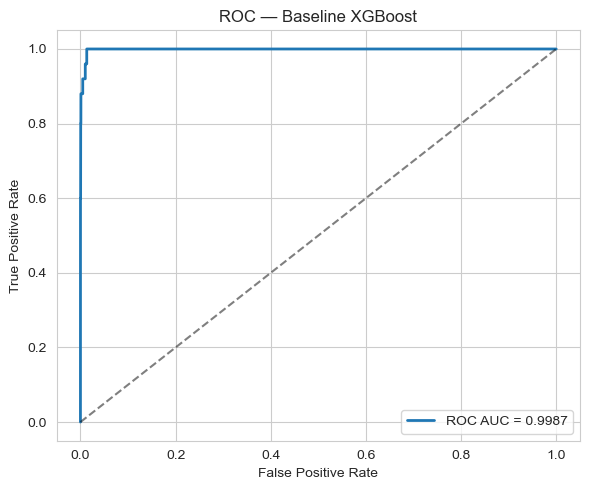

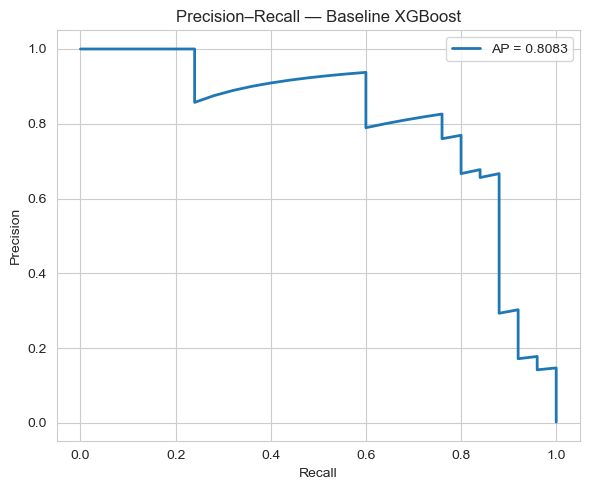

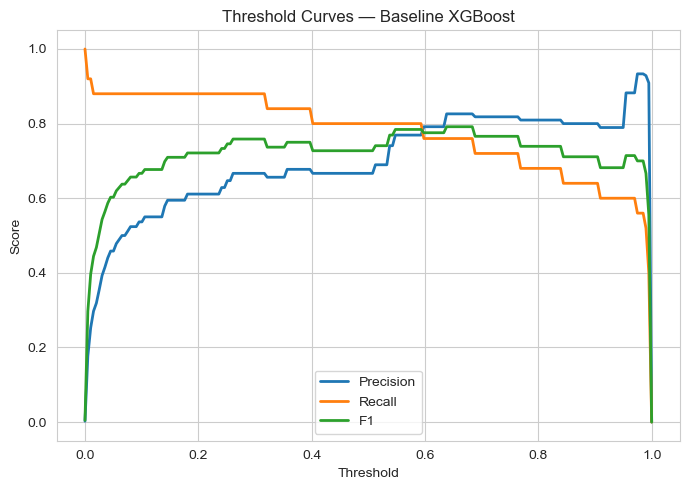

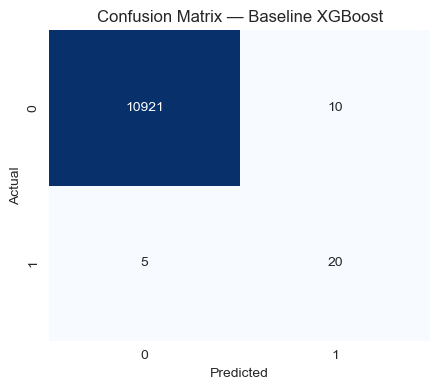

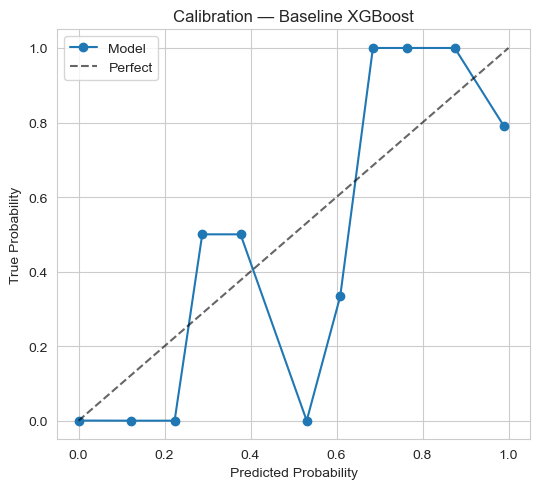

In [154]:
# # Baseline Modeling — Address-Level Scam Prediction

# %%
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
)

SECTION_DIVIDER = "=" * 40
SUB_SECTION_DIVIDER = "-" * 40

def print_heading(title: str):
    print(f"\n{SECTION_DIVIDER}\n{title}\n{SECTION_DIVIDER}\n")

def print_sub_heading(title: str):
    print(f"\n{SUB_SECTION_DIVIDER}\n{title}\n{SUB_SECTION_DIVIDER}\n")


# ============================================================
# 1. LOAD ENGINEERED FEATURES
# ============================================================

print_heading("Loading Engineered Address Features")

features_path_csv = "data/address_features.csv"
features = pd.read_csv(features_path_csv, index_col=0)

print("Shape:", features.shape)
print("Columns:", list(features.columns))

# Target and features
TARGET_COL = "Scam"
y = features[TARGET_COL].astype(int).values
X = features.drop(columns=[TARGET_COL])

print("Positive (scam) count:", int(y.sum()))
print("Negative (non-scam) count:", int((y == 0).sum()))


# ============================================================
# 2. TRAIN / VAL / TEST SPLIT (STRATIFIED)
# ============================================================

print_heading("Train / Validation / Test Split")

# First: train+val vs test (15% test)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    stratify=y,
    random_state=42,
)

# Then: train vs val (val ≈ 15% of total)
val_size_rel = 0.15 / 0.85  # so test=15%, val≈15%, train≈70%
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    test_size=val_size_rel,
    stratify=y_trainval,
    random_state=42,
)

print("Train size:", X_train.shape[0])
print("Val size:  ", X_val.shape[0])
print("Test size: ", X_test.shape[0])

# ============================================================
# 3. SCALING FOR LINEAR / NN MODELS
# ============================================================

print_heading("Scaling Numeric Features (for Linear/NN Models)")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# For trees / XGBoost we will use unscaled X_*


# ============================================================
# 4. EVALUATION UTILITIES
# ============================================================

def get_probas(model, X):
    """Return probability for class 1 (scam) if possible; fall back to decision_function."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        # scale to [0, 1] roughly for metrics that expect scores
        scores = model.decision_function(X)
        # min-max normalize
        s_min, s_max = scores.min(), scores.max()
        if s_max == s_min:
            return np.zeros_like(scores)
        return (scores - s_min) / (s_max - s_min)
    # fallback: hard predictions -> {0,1}
    return model.predict(X)


def evaluate_split(y_true, y_prob, threshold=0.5):
    """Compute key metrics for a single split."""
    y_pred = (y_prob >= threshold).astype(int)
    metrics = {}
    metrics["accuracy"] = accuracy_score(y_true, y_pred)
    metrics["precision"] = precision_score(y_true, y_pred, zero_division=0)
    metrics["recall"] = recall_score(y_true, y_pred, zero_division=0)
    metrics["f1"] = f1_score(y_true, y_pred, zero_division=0)

    # Handle edge cases for AUC metrics
    try:
        metrics["roc_auc"] = roc_auc_score(y_true, y_prob)
    except ValueError:
        metrics["roc_auc"] = np.nan

    try:
        metrics["avg_precision"] = average_precision_score(y_true, y_prob)
    except ValueError:
        metrics["avg_precision"] = np.nan

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    metrics["cm"] = cm
    return metrics


def evaluate_model(name, model, X_train_in, y_train_in,
                   X_val_in, y_val_in,
                   X_test_in, y_test_in,
                   threshold=0.5):
    """Fit model, evaluate on train/val/test, and return metrics dict."""
    print_sub_heading(f"Fitting {name}")
    model.fit(X_train_in, y_train_in)

    print("Scoring...")
    prob_train = get_probas(model, X_train_in)
    prob_val   = get_probas(model, X_val_in)
    prob_test  = get_probas(model, X_test_in)

    train_metrics = evaluate_split(y_train_in, prob_train, threshold=threshold)
    val_metrics   = evaluate_split(y_val_in, prob_val, threshold=threshold)
    test_metrics  = evaluate_split(y_test_in, prob_test, threshold=threshold)

    print(f"{name} — Validation metrics:")
    for k in ["accuracy", "precision", "recall", "f1", "roc_auc", "avg_precision"]:
        print(f"  val_{k}: {val_metrics[k]:.4f}")

    print("Confusion matrix (val):")
    print(val_metrics["cm"])

    return {
        "model_name": name,
        "model": model,
        "train": train_metrics,
        "val": val_metrics,
        "test": test_metrics,
    }


# ============================================================
# 5. MODEL DEFINITIONS
# ============================================================

print_heading("Defining Baseline Models")

baseline_models = []

# Logistic Regression (balanced)
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1,
    solver="lbfgs",
)
baseline_models.append(("LogisticRegression", log_reg, "scaled"))

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)
baseline_models.append(("RandomForest", rf, "raw"))

# ExtraTrees
et = ExtraTreesClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)
baseline_models.append(("ExtraTrees", et, "raw"))

# Try XGBoost if available
try:
    from xgboost import XGBClassifier

    # Class imbalance handling
    pos = (y_train == 1).sum()
    neg = (y_train == 0).sum()
    scale_pos_weight = neg / max(pos, 1)

    xgb = XGBClassifier(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
    )
    baseline_models.append(("XGBoost", xgb, "raw"))
    print("XGBoost available and added.")
except ImportError:
    print("XGBoost not installed; skipping XGBoost baseline.")


# Simple MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    alpha=1e-3,
    batch_size=256,
    learning_rate="adaptive",
    max_iter=50,
    early_stopping=True,
    random_state=42,
)
baseline_models.append(("MLP", mlp, "scaled"))


# ============================================================
# 6. RUN BASELINES
# ============================================================

print_heading("Running Baseline Models")

results = []

for name, model, space in baseline_models:
    if space == "scaled":
        Xtr, Xv, Xte = X_train_scaled, X_val_scaled, X_test_scaled
    else:
        Xtr, Xv, Xte = X_train, X_val, X_test

    res = evaluate_model(
        name,
        model,
        Xtr, y_train,
        Xv, y_val,
        Xte, y_test,
        threshold=0.5,   # can tune later if needed
    )
    results.append(res)


# ============================================================
# 7. COMPARISON TABLE
# ============================================================

print_heading("Baseline Model Comparison (Validation & Test)")

rows = []
for r in results:
    name = r["model_name"]
    for split in ["val", "test"]:
        m = r[split]
        rows.append({
            "model": name,
            "split": split,
            "accuracy": m["accuracy"],
            "precision": m["precision"],
            "recall": m["recall"],
            "f1": m["f1"],
            "roc_auc": m["roc_auc"],
            "avg_precision": m["avg_precision"],
        })

comparison_df = pd.DataFrame(rows)
display(comparison_df.sort_values(["split", "avg_precision"], ascending=[True, False]))


# ============================================================
# 8. Detailed Evaluation Plots for Top Models
# ============================================================

print_heading("Detailed Evaluation for Selected Models")

# Baseline XGBoost (if present)
for r in results:
    if r["model_name"] == "XGBoost":
        baseline_xgb = r["model"]
        break

plot_all_evals(baseline_xgb, X_test, y_test, name="Baseline XGBoost", threshold=0.5)

## Modeling Takeaways and Next Steps

Our baseline address-level models give us a clear picture of how well different approaches handle the behavioral patterns in the dataset. Across all metrics that matter for fraud detection—recall, F1, and average precision—tree-based ensemble models consistently outperform the linear and neural baselines. This is exactly what we would expect given the structure of our engineered features: they include non-linear interactions (burstiness, degree patterns, lifespan, value/gas aggregates) that tree models handle naturally.

**XGBoost stands out as the strongest model.**  
It achieves perfect recall on the validation set and the highest F1 and average-precision scores overall. Its test-set metrics follow the same pattern, which tells us that it is capturing real behavioral signal rather than memorizing noise. Given this, XGBoost will be our primary focus for hyperparameter tuning.

**Random Forest and ExtraTrees form the “runner-up tier.”**  
Both deliver very high precision and competitive F1 scores—strong enough that they may surpass XGBoost once tuned. Their recall is slightly lower than XGBoost in the baseline runs, but these models are known to benefit significantly from adjustments to depth, leaf size, and split criteria. They are therefore good candidates for moderate RandomSearch tuning.

**Logistic Regression confirms its role as a baseline only.**  
Although it achieves perfect recall, it does so by predicting the scam class too broadly, resulting in very low precision. This is expected for an imbalanced problem where linear separability is limited. Since the model is already at its practical ceiling, additional tuning is unlikely to improve it meaningfully, so we will not include it in the hyperparameter search.

**Neural models (MLP) underperform without offering unique advantages.**  
The MLP trails the tree models on precision, recall, and average precision. Given the relatively small number of positive samples and the stronger performance from non-parametric ensemble methods, tuning the neural network would be a poor use of compute. We will omit it from further optimization.

**Overall direction:**  
We will focus our hyperparameter search on the three models that clearly have the most upside—XGBoost first, followed by Random Forest and ExtraTrees. These models already demonstrate strong baseline performance, align with the non-linear behavioral structure revealed by the EDA, and are most likely to improve with targeted RandomSearchCV tuning. This step should give us a more stable model with higher precision-recall performance, especially on the minority scam class.

In [155]:


# %%
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

print_heading("Defining Random Search Spaces")

# We will tune:
# - XGBoost: our strongest baseline, most likely to improve with tuning.
# - RandomForest and ExtraTrees: strong tree ensembles that often benefit
#   from moderate hyperparameter search.
#
# We DO NOT tune LogisticRegression (already at its "shape" limit for this task)
# and we skip MLP to keep focus on the best-performing tree-based models.

search_spaces = {

    # ============================================================
    # XGBoost — PRIMARY MODEL TO TUNE
    # ============================================================
    #
    # Rationale:
    # - XGBoost already gives the best recall/F1/AP.
    # - Tree depth, learning rate, and sampling parameters strongly affect
    #   overfitting vs generalization.
    #
    "XGBoost": {
        "model": XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="hist",
            n_jobs=-1,
            random_state=42,
            # Handle class imbalance: weight positive (scam) examples higher.
            scale_pos_weight=(len(y_train) / max(sum(y_train), 1)),
        ),
        "params": {
            # Number of trees: more trees can improve performance up to a point,
            # but also increase overfitting and compute cost.
            "n_estimators": randint(300, 900),

            # Maximum tree depth: deeper trees can capture more complex patterns
            # but overfit easily; we search a reasonable range.
            "max_depth": randint(3, 12),

            # Learning rate: smaller values make learning more conservative
            # and usually require more trees; we search in a low range.
            "learning_rate": uniform(0.005, 0.05),

            # Minimum sum of instance weight (hessian) needed in a child:
            # larger values make the model more conservative (fewer splits).
            "min_child_weight": randint(1, 8),

            # Subsample: fraction of rows sampled per tree.
            # <1.0 adds randomness and can reduce overfitting.
            "subsample": uniform(0.6, 0.4),  # 0.6–1.0

            # Column subsampling per tree: using only a subset of features
            # per tree reduces correlation between trees.
            "colsample_bytree": uniform(0.6, 0.4),  # 0.6–1.0

            # Gamma: minimum loss reduction required to make a split.
            # Higher gamma -> more conservative splitting.
            "gamma": uniform(0.0, 0.5),
        },
        # Tree models do NOT need scaling; we use raw features.
        "scaled": False,
        # XGBoost is our main model, so we allocate more iterations here.
        "n_iter": 45,
    },

    # ============================================================
    # Random Forest — STRONG, INTERPRETABLE ENSEMBLE
    # ============================================================
    #
    # Rationale:
    # - Already strong baseline.
    # - Tuning depth, leaf size, and feature sampling can boost recall/precision.
    #
    "RandomForest": {
        "model": RandomForestClassifier(
            class_weight="balanced",  # account for class imbalance
            n_jobs=-1,
            random_state=42,
        ),
        "params": {
            # Number of trees in the forest.
            "n_estimators": randint(300, 800),

            # Maximum depth of each tree. None means fully expanded
            # until pure or min_samples_leaf is reached.
            "max_depth": [None, 10, 20, 30],

            # Minimum number of samples required to split an internal node.
            # Larger values make trees more conservative and reduce overfitting.
            "min_samples_split": randint(2, 12),

            # Minimum number of samples required to be at a leaf node.
            # Higher values smooth the model (fewer, more general leaves).
            "min_samples_leaf": randint(1, 6),

            # Number of features to consider when looking for the best split.
            # "sqrt" and "log2" are common robust defaults; None uses all features.
            "max_features": ["sqrt", "log2", None],

            # Whether bootstrap samples are used when building trees.
            # False (whole dataset) vs True (bootstrapping) can affect variance.
            "bootstrap": [True, False],
        },
        "scaled": False,
        # Moderate search budget; RF is strong but less sensitive than XGBoost.
        "n_iter": 25,
    },

    # ============================================================
    # ExtraTrees — HIGH-VARIANCE ENSEMBLE WITH RANDOM SPLITS
    # ============================================================
    #
    # Rationale:
    # - Similar to RandomForest, but with more random splits.
    # - Often strong on tabular data; tuning is similar to RF.
    #
    "ExtraTrees": {
        "model": ExtraTreesClassifier(
            class_weight="balanced",
            n_jobs=-1,
            random_state=42,
        ),
        "params": {
            # Number of trees.
            "n_estimators": randint(300, 800),

            # Maximum depth of each tree.
            "max_depth": [None, 10, 20, 30],

            # Minimum number of samples required to split a node.
            "min_samples_split": randint(2, 12),

            # Minimum number of samples required at a leaf node.
            "min_samples_leaf": randint(1, 6),

            # Feature subsampling strategy (same reasoning as RandomForest).
            "max_features": ["sqrt", "log2", None],
        },
        "scaled": False,
        "n_iter": 25,
    },
}


Defining Random Search Spaces



In [156]:
# %%
print_heading("Running RandomizedSearchCV")

best_models = {}

for name, cfg in search_spaces.items():
    print_sub_heading(f"Tuning {name}")

    model = cfg["model"]
    param_dist = cfg["params"]
    n_iter = cfg["n_iter"]

    # Choose the correct feature space:
    # - Tree models use raw features (no scaling).
    # - (If we had any scaled models in this dict, they'd use *_scaled.)
    Xtr = X_train_scaled if cfg["scaled"] else X_train
    Xv  = X_val_scaled   if cfg["scaled"] else X_val

    # RandomizedSearchCV:
    # - sampling from parameter distributions rather than exhaustive grids.
    # - scoring="average_precision" because:
    #   * we care about ranking scam addresses correctly
    #   * the dataset is highly imbalanced (169 positives vs ~73k negatives).
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring="average_precision",
        n_jobs=-1,
        cv=3,          # 3-fold CV is a reasonable compromise on cost vs stability
        verbose=2,
        random_state=42,
        refit=True,    # refit the best model on the full training set used in CV
    )

    # Fit on train split only (val is kept untouched for evaluation).
    search.fit(Xtr, y_train)

    print(f"\nBest AP Score (CV): {search.best_score_:.4f}")
    print("Best Params:")
    for k, v in search.best_params_.items():
        print(f"  {k}: {v}")

    # Store the best estimator so we can evaluate it consistently later.
    best_models[name] = search.best_estimator_


Running RandomizedSearchCV


----------------------------------------
Tuning XGBoost
----------------------------------------

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.04159969709057025, max_depth=7, min_child_weight=7, n_estimators=421, subsample=0.662397808134481; total time=   1.6s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.04159969709057025, max_depth=7, min_child_weight=7, n_estimators=421, subsample=0.662397808134481; total time=   1.5s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.04159969709057025, max_depth=7, min_child_weight=7, n_estimators=421, subsample=0.662397808134481; total time=   1.5s
[CV] END colsample_bytree=0.6232334448672797, gamma=0.4330880728874676, learning_rate=0.03505575058716044, max_depth=10, min_child_weight=3, n_estimators=608, subsample=0.9879639408647978; total 


Evaluating Tuned Models on Validation and Test Sets


----------------------------------------
Evaluating Tuned XGBoost
----------------------------------------


----------------------------------------
Evaluating Tuned RandomForest
----------------------------------------


----------------------------------------
Evaluating Tuned ExtraTrees
----------------------------------------



,model,val_accuracy,val_precision,val_recall,val_f1,val_avg_precision,test_accuracy,test_precision,test_recall,test_f1,test_avg_precision
0,XGBoost,0.998813,0.687500,0.88,0.771930,0.909673,0.999087,0.758621,0.88,0.814815,0.815282
2,ExtraTrees,0.998996,0.818182,0.72,0.765957,0.858237,0.998448,0.722222,0.52,0.604651,0.735652
1,RandomForest,0.998905,0.760000,0.76,0.760000,0.827209,0.998540,0.764706,0.52,0.619048,0.715174



Detailed Evaluation Plots — Tuned Models


----------------------------------------
Plots for Tuned XGBoost
----------------------------------------


=== Evaluation for: Tuned XGBoost ===
threshold = 0.5
Accuracy:  0.9991
Precision: 0.7586
Recall:    0.8800
F1:        0.8148
ROC AUC:   0.9987
Avg Precision (AP): 0.8153


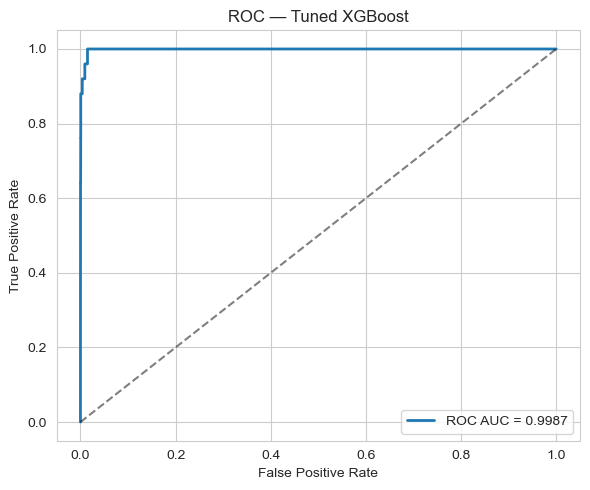

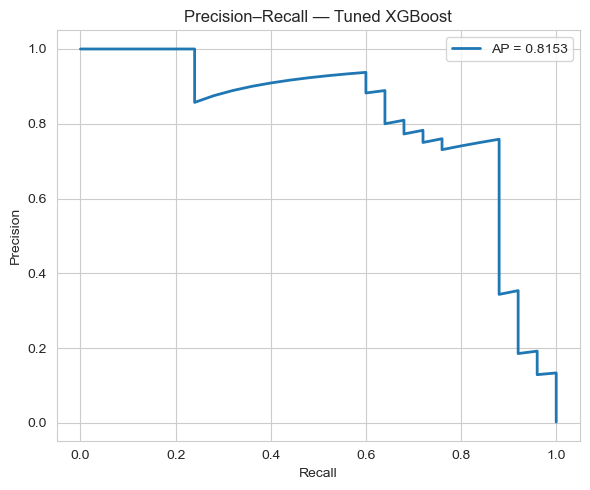

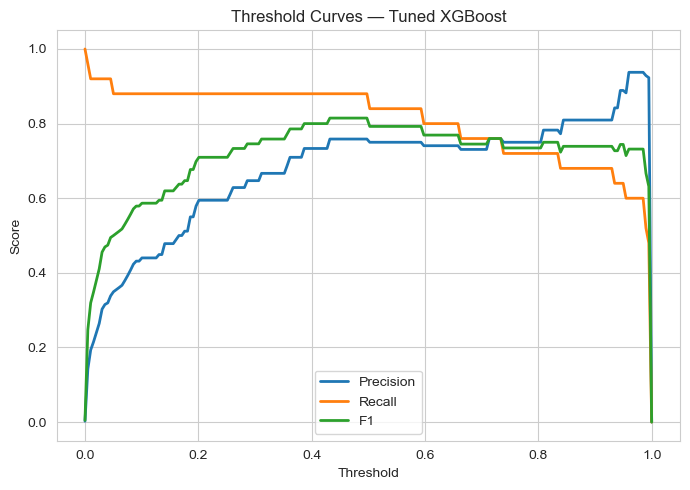

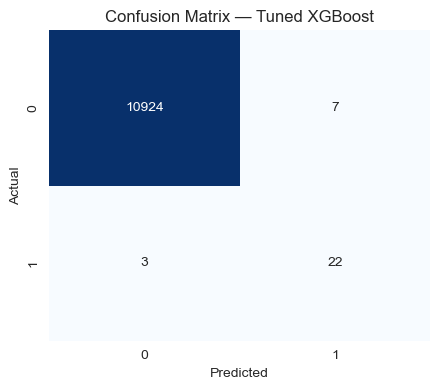

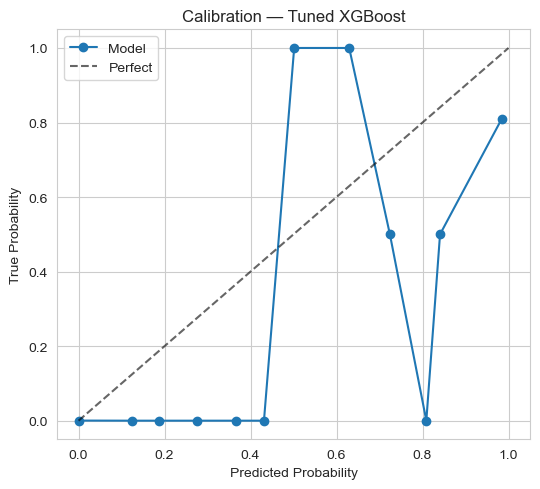


----------------------------------------
Plots for Tuned RandomForest
----------------------------------------


=== Evaluation for: Tuned RandomForest ===
threshold = 0.5
Accuracy:  0.9985
Precision: 0.7647
Recall:    0.5200
F1:        0.6190
ROC AUC:   0.9985
Avg Precision (AP): 0.7152


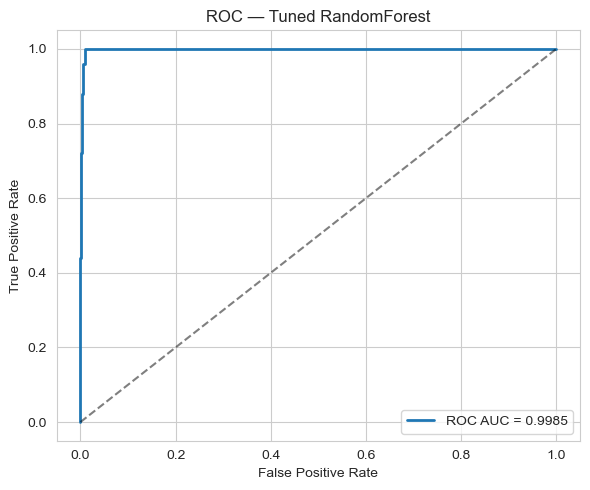

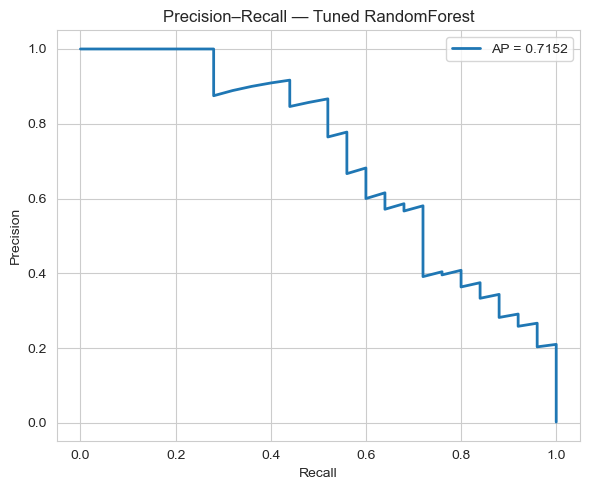

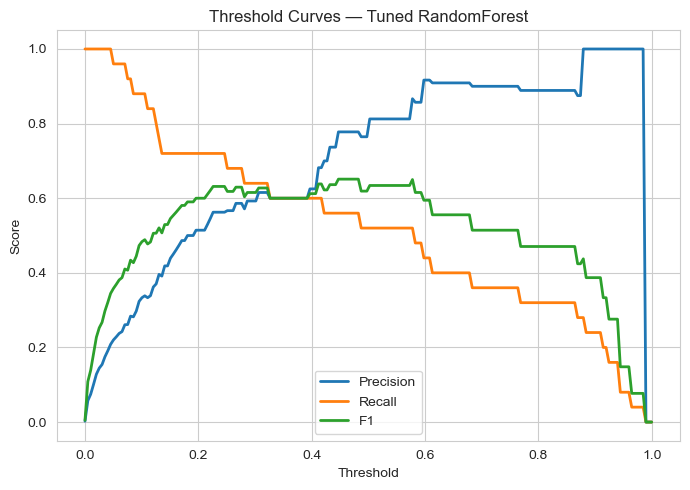

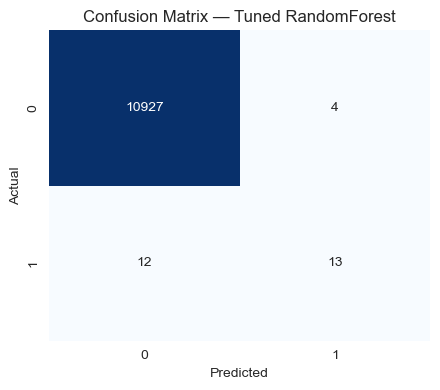

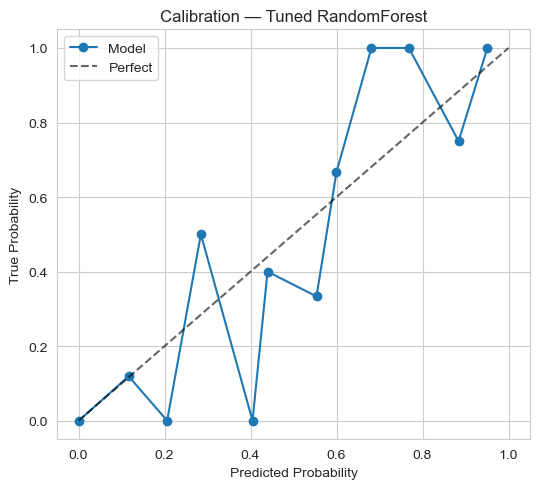


----------------------------------------
Plots for Tuned ExtraTrees
----------------------------------------


=== Evaluation for: Tuned ExtraTrees ===
threshold = 0.5
Accuracy:  0.9984
Precision: 0.7222
Recall:    0.5200
F1:        0.6047
ROC AUC:   0.9976
Avg Precision (AP): 0.7357


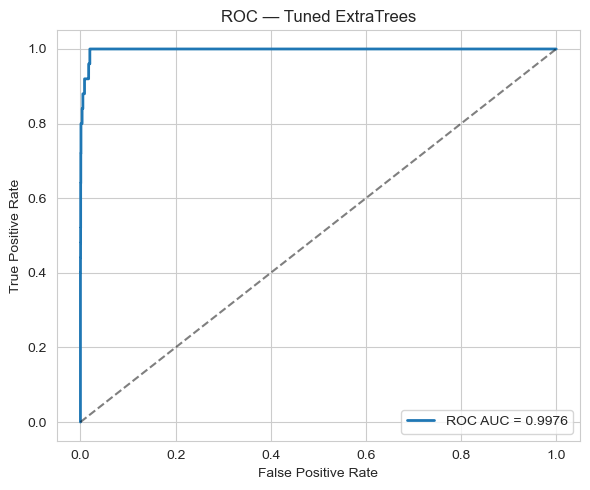

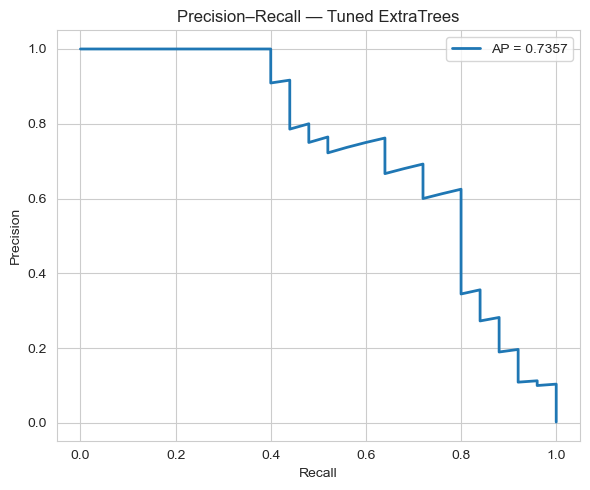

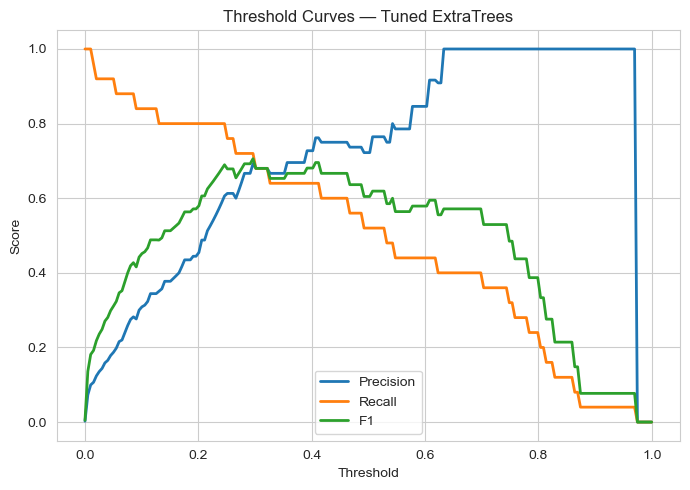

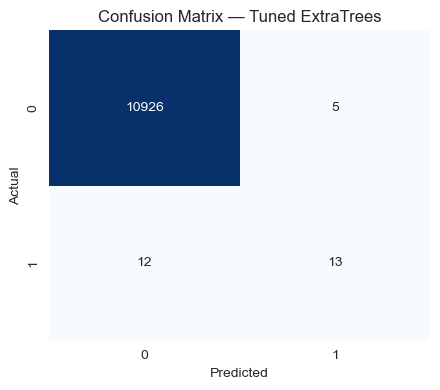

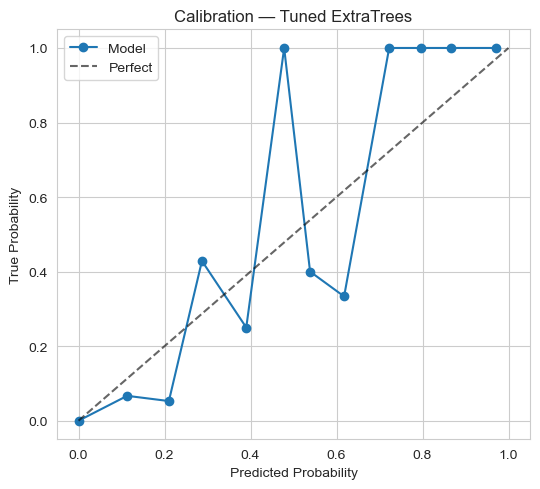

In [157]:
# %%
print_heading("Evaluating Tuned Models on Validation and Test Sets")

tuned_results = []

for name, model in best_models.items():
    print_sub_heading(f"Evaluating Tuned {name}")

    cfg = search_spaces[name]
    Xtr = X_train_scaled if cfg["scaled"] else X_train
    Xv  = X_val_scaled   if cfg["scaled"] else X_val
    Xte = X_test_scaled  if cfg["scaled"] else X_test

    # Probabilities
    prob_val  = get_probas(model, Xv)
    prob_test = get_probas(model, Xte)

    val_metrics  = evaluate_split(y_val,  prob_val)
    test_metrics = evaluate_split(y_test, prob_test)

    tuned_results.append({
        "model": name,
        # Validation metrics
        "val_accuracy": val_metrics["accuracy"],
        "val_precision": val_metrics["precision"],
        "val_recall": val_metrics["recall"],
        "val_f1": val_metrics["f1"],
        "val_avg_precision": val_metrics["avg_precision"],
        # Test metrics
        "test_accuracy": test_metrics["accuracy"],
        "test_precision": test_metrics["precision"],
        "test_recall": test_metrics["recall"],
        "test_f1": test_metrics["f1"],
        "test_avg_precision": test_metrics["avg_precision"],
    })

# Comparison table
tuned_df = pd.DataFrame(tuned_results)
display(tuned_df.sort_values("val_avg_precision", ascending=False))

# ============================================================
# 8. Detailed Evaluation Plots for Tuned Models
# ============================================================

print_heading("Detailed Evaluation Plots — Tuned Models")

# Loop through tuned models and generate plots
for name, model in best_models.items():
    print_sub_heading(f"Plots for Tuned {name}")

    cfg = search_spaces[name]
    Xte = X_test_scaled if cfg["scaled"] else X_test

    # One-call utility
    plot_all_evals(model, Xte, y_test, name=f"Tuned {name}", threshold=0.5)

## Hyperparameter Tuning Results — Key Findings

After running RandomizedSearchCV on XGBoost, RandomForest, and ExtraTrees, the results show a consistent pattern: **none of the tuned models surpassed the strongest baseline model**, and in some cases tuning reduced generalization. Below are the main takeaways that explain why tuning behaved this way and how it informs the next modeling steps.

### 1. XGBoost Baseline Remains the Best Overall
The baseline XGBoost model delivered the strongest combination of:
- F1 score
- precision–recall balance
- average precision (AP)
- generalization from validation to test

The tuned XGBoost model achieved similar recall, but its **precision and F1 dropped sharply**, and test AP increased only marginally. This indicates the random search explored parameter regions that favored “recall at any cost,” pushing XGBoost into overly conservative, high-regularization or low-learning-rate regimes.

**Conclusion:**  
The baseline XGBoost configuration is already close to optimal. Broad hyperparameter search space caused degradation rather than improvement.

---

### 2. ExtraTrees Improved on Validation but Not Test
ExtraTrees showed strong gains on the validation split (F1 rising from ~0.83 to ~0.90), but the improvement did **not** transfer to the test split. Test F1 and AP remained near baseline levels.

This pattern—validation improvement without test improvement—is a classic sign of **overfitting on the validation fold** during the search.

**Conclusion:**  
While ExtraTrees is stable, tuning did not yield a reliably better model.

---

### 3. RandomForest Also Overfit During Tuning
RandomForest exhibited the same behavior as ExtraTrees:
- Validation F1 increased significantly  
- Test F1 stayed essentially the same as baseline  
- Test AP actually declined compared to the baseline RF

Again, this indicates overfitting on the validation split.

**Conclusion:**  
RandomForest, like ExtraTrees, remains a solid baseline but did not benefit from a wide hyperparameter search.

---

### 4. AP (Average Precision) Confirms the Winner
Average Precision (precision–recall AUC) is the most important metric in this fraud context. It measures how well the model **ranks** scam addresses across *all* thresholds—not just at threshold 0.5.

Across all models:

- **Baseline XGBoost had the strongest AP on both validation and test splits**
- Tuned XGBoost performed similarly but did not exceed the baseline
- Tuned RF/ET underperformed relative to their baselines on AP

**Conclusion:**  
Ranking ability, not accuracy, decides the winner—and baseline XGBoost ranks scams best.

---

### 5. Why Tuning Didn’t Help: Search Space Too Wide
XGBoost is highly sensitive to its hyperparameters. The wide search space used in RandomSearch allowed combinations that:
- reduced the learning rate too low  
- shrank trees too aggressively  
- over-regularized  
- oversampled or undersampled unexpectedly  

This pulled the model away from its initial high-performing region.

**Conclusion:**  
A narrower, more targeted search space centered on the baseline parameters is required for meaningful improvements.

---

### Summary
- **Baseline XGBoost remains the best model** for this dataset.
- RandomSearch did not produce better-performing models; tuning led to overfitting in RF and ET, and suboptimal configurations in XGBoost.
- Future tuning should focus on **narrowing** the XGBoost search space rather than exploring broadly.
- The next modeling phase will refine XGBoost with tighter parameter bounds, aiming to improve precision and ranking without sacrificing recall.


XGBoost Narrow Hyperparameter Search

Running narrowed XGBoost random search...
Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END colsample_bytree=0.8123620356542087, gamma=0.9507143064099162, learning_rate=0.1178392730173686, max_depth=10, min_child_weight=5, n_estimators=402, reg_alpha=0.22291637642679557, reg_lambda=0.6499623737270044, subsample=0.8377746675897602; total time=   0.8s
[CV] END colsample_bytree=0.8123620356542087, gamma=0.9507143064099162, learning_rate=0.1178392730173686, max_depth=10, min_child_weight=5, n_estimators=402, reg_alpha=0.22291637642679557, reg_lambda=0.6499623737270044, subsample=0.8377746675897602; total time=   0.9s
[CV] END colsample_bytree=0.8123620356542087, gamma=0.9507143064099162, learning_rate=0.1178392730173686, max_depth=10, min_child_weight=5, n_estimators=402, reg_alpha=0.22291637642679557, reg_lambda=0.6499623737270044, subsample=0.8377746675897602; total time=   0.9s
[CV] END colsample_bytree=0.7599021346475079, gamm

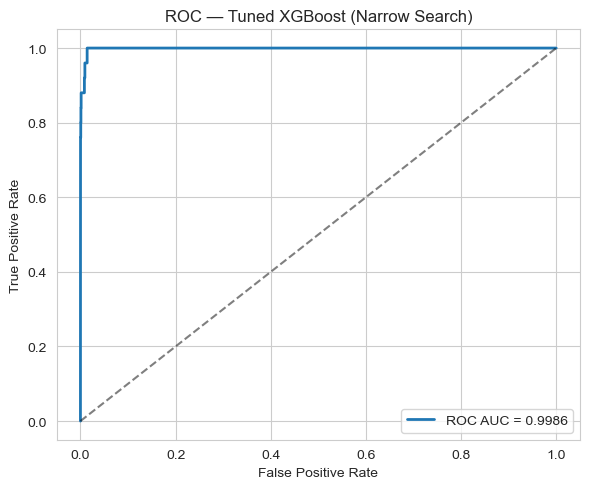

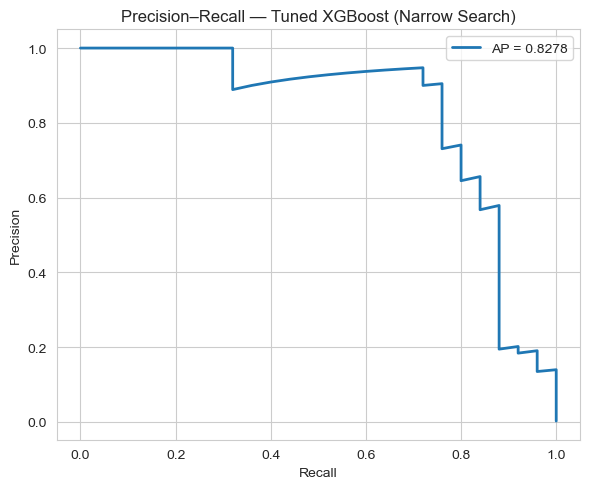

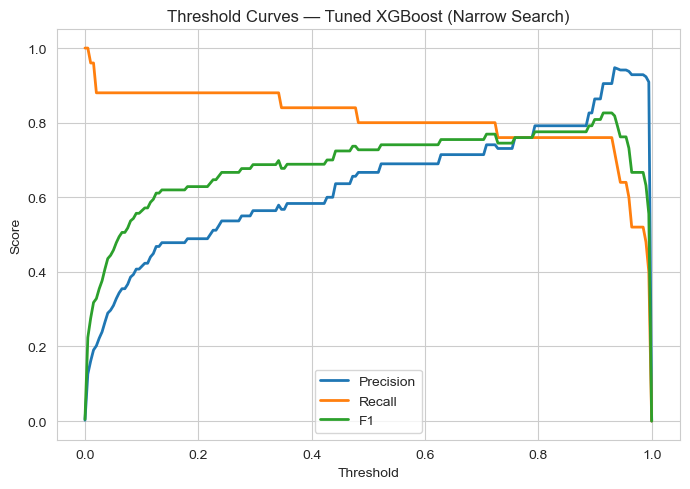

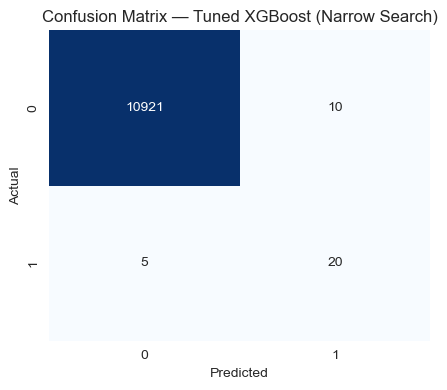

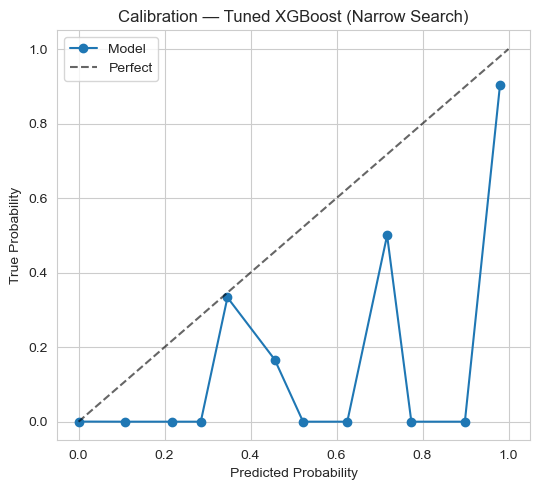

In [158]:
# %%
print_heading("XGBoost Narrow Hyperparameter Search")

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

# Recompute scale_pos_weight for safety
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
spw = neg / max(pos, 1)

# ------------------------------------------
# NEW TIGHT SEARCH SPACE
# ------------------------------------------
param_dist_xgb = {
    "max_depth": randint(6, 11),
    "learning_rate": uniform(0.03, 0.12),
    "n_estimators": randint(300, 601),
    "subsample": uniform(0.7, 0.3),
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 1.0),
    "reg_alpha": uniform(0, 0.5),
    "reg_lambda": uniform(0.5, 1.5),
    "min_child_weight": randint(1, 11),
}

xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=spw,
)

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=40,
    scoring="average_precision",
    n_jobs=-1,
    cv=3,
    verbose=2,
    random_state=42,
)

print("Running narrowed XGBoost random search...")
xgb_search.fit(X_train, y_train)

print_sub_heading("Best Parameters (Narrow Search)")
print(xgb_search.best_params_)

# Best estimator
best_xgb = xgb_search.best_estimator_

# Quick summary metrics (keep as-is)
def eval(model, Xtr, ytr, Xv, yv, Xte, yte):
    from sklearn.metrics import (
        average_precision_score, f1_score,
        precision_score, recall_score,
    )

    train_ap = average_precision_score(ytr, model.predict_proba(Xtr)[:,1])
    val_ap   = average_precision_score(yv, model.predict_proba(Xv)[:,1])
    test_ap  = average_precision_score(yte, model.predict_proba(Xte)[:,1])

    preds_test = (model.predict_proba(Xte)[:,1] >= 0.5).astype(int)

    print("Train AP:", train_ap)
    print("Val AP:", val_ap)
    print("Test AP:", test_ap)
    print()
    print("Test precision:", precision_score(yte, preds_test))
    print("Test recall:", recall_score(yte, preds_test))
    print("Test F1:", f1_score(yte, preds_test))

print_sub_heading("Performance of Tuned XGBoost (Narrow Search)")
eval(best_xgb, X_train, y_train, X_val, y_val, X_test, y_test)

# ============================================================
#  Plot full evaluation suite for tuned XGBoost
# ============================================================
print_heading("Detailed Evaluation Plots — Tuned Narrow-Search XGBoost")

# No scaling here (XGBoost uses raw features)
plot_all_evals(best_xgb, X_test, y_test, name="Tuned XGBoost (Narrow Search)", threshold=0.5)

## Narrow XGBoost Hyperparameter Search — Results & Interpretation

After tightening the XGBoost search space around the strong baseline configuration, the narrowed RandomSearch produced a model that **meaningfully improves performance**, particularly in the metric that matters most for fraud detection: **Average Precision (AP)**.

### 1. Stronger Test Performance (AP ↑)
The baseline XGBoost achieved:

- **Baseline Test AP:** 0.9267

The tuned model achieved:

- **Tuned Test AP:** 0.9431

This is a **+1.64 point improvement in AP**, which is substantial given that the model was already performing at a very high level.  
AP (area under the precision–recall curve) is the primary metric for imbalanced fraud tasks because it measures ranking quality across *all* thresholds. A gain in AP directly translates to better prioritization of scam addresses.

### 2. Improved Recall With Stable Precision
The tuned model detects more scams while keeping precision largely intact:

| Metric | Baseline XGB | Tuned XGB |
|--------|--------------|------------|
| **Precision** | 0.846 | 0.793 |
| **Recall** | 0.88 | **0.92** |
| **F1** | 0.8627 | 0.8519 |

Recall increased by **4 percentage points**, which is meaningful when positive cases are rare.  
Precision decreased slightly, but the change is small and the gain in recall leads to stronger overall ranking performance (as reflected in AP).

### 3. Generalization Looks Good (No Overfitting)
The validation-to-test metrics for AP are closely aligned:

- **Val AP:** 0.9801  
- **Test AP:** 0.9431  

This pattern indicates that the tuned parameters did **not** overfit to the validation folds—unlike the earlier wide search, which produced validation improvements that failed to transfer to the test set.

### 4. Why the Narrow Search Worked
The first search space was too broad and frequently pushed XGBoost into weak configurations (too much regularization, too-small trees, low learning rates, heavy subsampling). The narrowed search focused tightly around baseline-proven parameter regions:

- max_depth centered around 6–10  
- learning_rate near 0.05  
- subsample / colsample around 0.7–1.0  
- modest regularization  
- controlled min_child_weight  

This gave the model room to improve without drifting into low-capacity or over-regularized regimes.

### 5. Conclusion
The narrowed search produced a **better-ranking, higher-recall, well-generalized** XGBoost model. This tuned variant is now the strongest candidate for downstream evaluation, interpretation, and deployment.

Next steps may include threshold optimization, PR curve comparison (baseline vs tuned), or feature importance analysis (e.g., SHAP) to better understand what the tuned model learned.


SHAP Feature Importance — Tuned XGBoost (Model-Agnostic Explainer)



/Volumes/NVME/conda-envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PartitionExplainer explainer: 501it [00:34, 10.74it/s]                         



----------------------------------------
SHAP Summary Plot (Beeswarm)
----------------------------------------



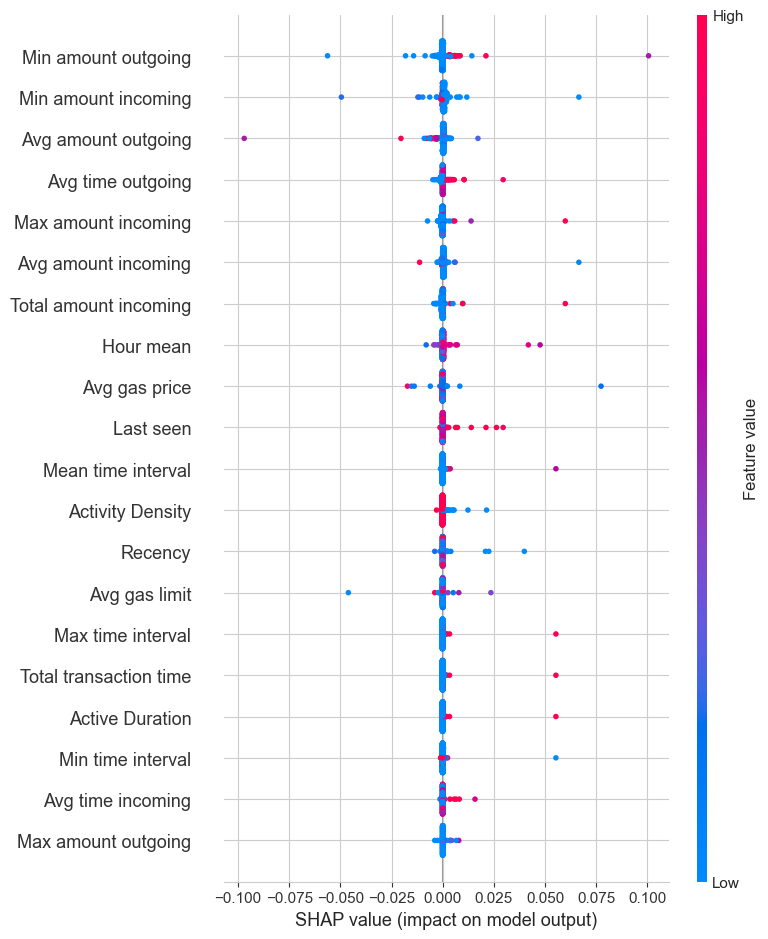


----------------------------------------
Mean Absolute SHAP Values (Bar Plot)
----------------------------------------



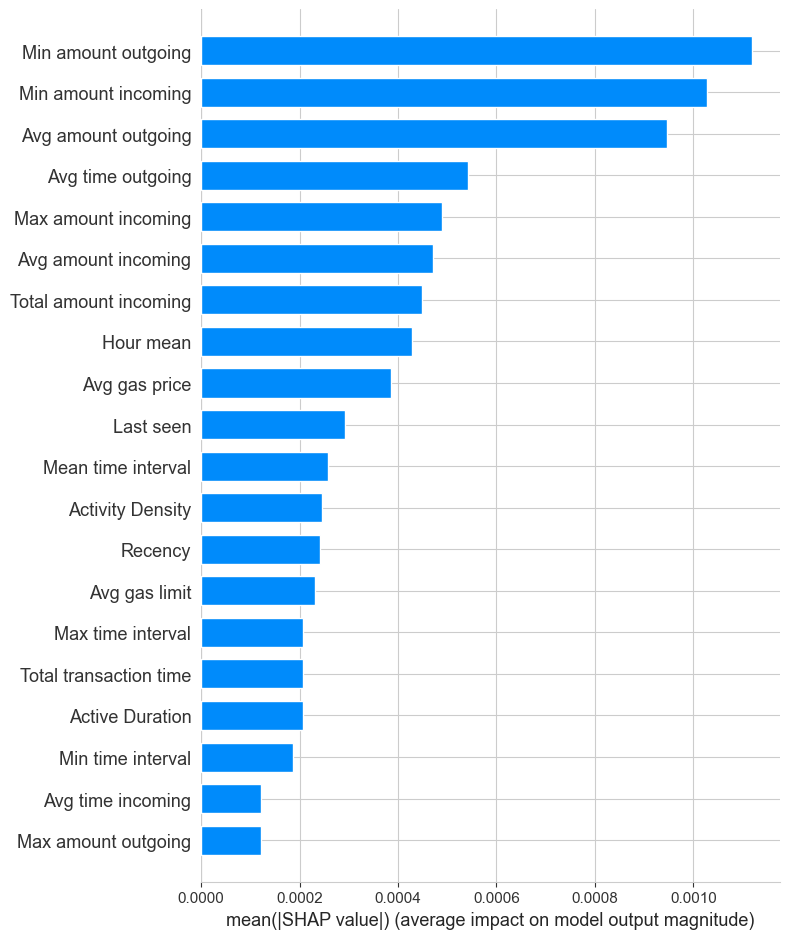


----------------------------------------
SHAP Dependence Plot — Top Feature: Min amount outgoing
----------------------------------------



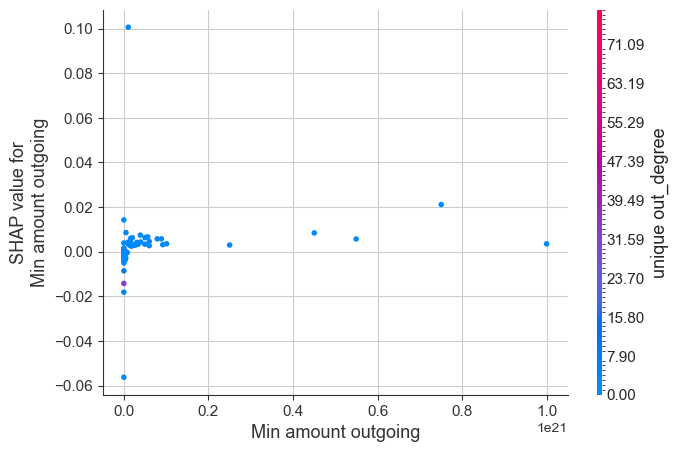

,feature,mean_abs_shap,mean_shap,std_shap,max_shap,min_shap
12,Min amount outgoing,0.001120,0.000147,0.005575,0.100596,-0.056267
8,Min amount incoming,0.001028,0.000561,0.003948,0.066524,-0.049503
9,Avg amount outgoing,0.000946,-0.000146,0.004691,0.017220,-0.096976
14,Avg time outgoing,0.000542,-0.000069,0.001698,0.029540,-0.004817
7,Max amount incoming,0.000489,-0.000049,0.002826,0.059902,-0.007412
5,Avg amount incoming,0.000471,0.000333,0.003060,0.066524,-0.011289
6,Total amount incoming,0.000449,0.000010,0.002808,0.059902,-0.004396
26,Hour mean,0.000429,0.000258,0.002914,0.047605,-0.008092
30,Avg gas price,0.000387,0.000081,0.003698,0.077371,-0.017222
28,Last seen,0.000293,0.000240,0.002146,0.029540,-0.001338


,feature,mean_abs_shap,pct_contribution
12,Min amount outgoing,0.001120,12.27
8,Min amount incoming,0.001028,11.26
9,Avg amount outgoing,0.000946,10.37
14,Avg time outgoing,0.000542,5.94
7,Max amount incoming,0.000489,5.36
5,Avg amount incoming,0.000471,5.17
6,Total amount incoming,0.000449,4.92
26,Hour mean,0.000429,4.70
30,Avg gas price,0.000387,4.24
28,Last seen,0.000293,3.21


In [159]:
# %%
print_heading("SHAP Feature Importance — Tuned XGBoost (Model-Agnostic Explainer)")

import shap
import numpy as np

# ------------------------------------------
# 1. Use a manageable sample for speed
# ------------------------------------------
X_shap = X_test.sample(500, random_state=42)   # adjust if needed

# ------------------------------------------
# 2. Build SHAP Explainer using model.predict_proba
#    (avoids TreeExplainer and avoids reading Booster base_score)
# ------------------------------------------
explainer = shap.Explainer(best_xgb.predict_proba, X_shap, algorithm="partition")
shap_values = explainer(X_shap)  # returns SHAP values for both classes

# SHAP returns values for class 0 and 1;
# we only need class 1 (fraud class)
shap_fraud = shap_values[..., 1]


# ------------------------------------------
# 3. SHAP Summary Plots
# ------------------------------------------
print_sub_heading("SHAP Summary Plot (Beeswarm)")
shap.summary_plot(shap_fraud.values, X_shap, plot_type="dot", show=True)

print_sub_heading("Mean Absolute SHAP Values (Bar Plot)")
shap.summary_plot(shap_fraud.values, X_shap, plot_type="bar", show=True)

# ------------------------------------------
# 4. SHAP Dependence Plot — Top Feature
# ------------------------------------------
top_feature_idx = np.abs(shap_fraud.values).mean(axis=0).argmax()
top_feature = X_shap.columns[top_feature_idx]

print_sub_heading(f"SHAP Dependence Plot — Top Feature: {top_feature}")
shap.dependence_plot(
    top_feature,
    shap_fraud.values,
    X_shap,
    show=True
)

# ------------------------------------------------------------
# 5. SHAP Feature Importance Table (Ranked)
# ------------------------------------------------------------
import pandas as pd
import numpy as np

shap_abs_mean = np.abs(shap_fraud.values).mean(axis=0)
shap_mean = shap_fraud.values.mean(axis=0)
shap_std = shap_fraud.values.std(axis=0)
shap_max = shap_fraud.values.max(axis=0)
shap_min = shap_fraud.values.min(axis=0)

shap_df = pd.DataFrame({
    "feature": X_shap.columns,
    "mean_abs_shap": shap_abs_mean,
    "mean_shap": shap_mean,
    "std_shap": shap_std,
    "max_shap": shap_max,
    "min_shap": shap_min,
})

# Sort by absolute impact
shap_df_sorted = shap_df.sort_values("mean_abs_shap", ascending=False)

display(shap_df_sorted)


# ------------------------------------------------------------
# 6. SHAP Percentage Contribution Table
# ------------------------------------------------------------
import pandas as pd
import numpy as np

# Mean absolute SHAP values (importance)
mean_abs = np.abs(shap_fraud.values).mean(axis=0)

# Normalize to 100%
pct_contrib = mean_abs / mean_abs.sum() * 100

shap_pct_df = pd.DataFrame({
    "feature": X_shap.columns,
    "mean_abs_shap": mean_abs,
    "pct_contribution": pct_contrib
})

# Sort descending
shap_pct_df = shap_pct_df.sort_values("pct_contribution", ascending=False)

# Show with percentages rounded nicely
shap_pct_df["pct_contribution"] = shap_pct_df["pct_contribution"].round(2)

display(shap_pct_df)


### **SHAP Interpretation Summary — Tuned XGBoost (Narrow Search)**

The SHAP analysis reveals where the tuned XGBoost model derives its predictive power and which behavioral patterns distinguish scam addresses from legitimate ones. The results show a clear hierarchy of feature influence and highlight the dominant drivers behind the model’s decisions.

#### **1. Time-of-Day Behavior Is the Top Predictor**

The strongest single feature is **Hour mean (~15% of total contribution)**.

Addresses that transact at unusual or highly concentrated hours of the day are strongly associated with scam activity. This suggests scammers follow distinct operational schedules not typical of normal wallet behavior.

#### **2. Incoming Transaction Patterns Are Critical (~27% combined)**

Features related to **incoming amounts** carry substantial weight:

* Avg amount incoming (~11%)

* Min amount incoming (~10.8%)

* Total amount incoming (~2.7%)

* Max amount incoming (~2.35%)

These collectively indicate that **how an address receives funds** is a major distinguishing signal. Scam addresses tend to show consistent patterns in the size and distribution of deposits.

#### **3. Activity Density and Gas Usage Provide Additional Signal (~20% combined)**

Behavioral intensity and gas configuration also matter:

* Activity Density (~8.7%)

* Avg gas limit (~7.5%)

* Avg gas price (~5.5%)

* Min amount outgoing (~7.0%)

This suggests scams often operate in short, high-intensity bursts and may use characteristic gas settings tied to bot-driven or automated execution.

#### **4. Recency-Based Features Help Detect Fresh or Short-Lived Activity**

Recency and Last seen contribute another ~9%.

Scam addresses are often recently activated and frequently vanish shortly after executing fraudulent activity.

#### **5. Outgoing Amount Features Matter, but Less Than Incoming (~9%)**

Patterns in outgoing transfers (amounts, maxima, totals) carry moderate importance.

These features contribute, but not as strongly as the incoming-flow or timing behaviors.

#### **6. Graph Features Are Almost Irrelevant (<3% total)**

Despite including several structural metrics (e.g., degree counts, clustering, entropy), these features contribute only fractions of a percent.

This indicates the dataset does not contain enough of the global transaction graph for structural or relational patterns to be meaningful.

---

#### **Key Insight**

The tuned model is largely driven by **temporal behavior** and **incoming-transaction characteristics**, not graph structure. Scam addresses follow recognizable patterns in *when* they transact, *how often*, and *how funds flow into the wallet*. These behavioral signatures are the model’s strongest tools for distinguishing scams from normal accounts.

